# Projeto de Teste A/B

Os principais objetivos do projeto são entender como a introdução de uma nova recomendação do sistema melhorado afeta a entrada e/ou permanência dos usuários. De acorco com os dados coletados anteriormente, os usuários foram divididos em 2 grupos: o grupo A, de controle, e o grupo B, após o funil de novos pagamentos. A data inicio do teste foi dia 07/12/2020 e o término foi dia 01/01/2021. Dia 21/12/2020 foi a data quando pararam de receber novos usuários. Além disso, foi observado, ainda de acordo com essa primeira análise, um aumento de 15% de novos usuários da região da EU.
O resultado esperado é, em até 14 dia após o cadastro, será possivel observar uma melhor conversão dos usuários nas visualizações de páginas do produto (o evento product_page), ao adicionar itens no carrinho (product_card) e compras (purchase). A casa etapa do funil deve ter ao menos 10% de aumento. Além disso, espera-se que pelo menos 6000 usuários participem do teste.

# Explore os dados e análise exploratória de dados

In [1]:
# importanto bibliotecas
import pandas as pd
import seaborn as sns
import plotly.express as px
from datetime import datetime
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

Primeiro foi analisado a tabela que contém o calendário de eventos de marketing para o ano de 2000

In [2]:
calendarioeventos = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')

In [3]:
calendarioeventos

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [4]:
calendarioeventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [5]:
regions_expanded = calendarioeventos['regions'].str.split(', ', expand=True)
regions_expanded.columns = [f'Region_{i+1}' for i in range(regions_expanded.shape[1])]
calendarioeventos = calendarioeventos.join(regions_expanded)

In [6]:
calendarioeventos

,name,regions,start_dt,finish_dt,Region_1,Region_2,Region_3,Region_4
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,EU,N.America,None,None
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16,EU,CIS,APAC,N.America
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19,EU,N.America,None,None
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19,EU,CIS,APAC,N.America
4,4th of July Promo,N.America,2020-07-04,2020-07-11,N.America,None,None,None
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01,EU,CIS,APAC,N.America
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07,APAC,None,None,None
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03,EU,CIS,APAC,None
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10,EU,CIS,APAC,None
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11,CIS,None,None,None


Na coluna regions, foi possível observar que os eventos estão ocorrento em mais de uma região. Para se ter uma noção maior de quantos eventos estão acontecendo em cada região, a coluna foi dividida em várias colunas para que cada uma contenha apenas uma região e com isso concluir quais regiões estão recebendo mais eventos

In [7]:
calendarioeventos['start_dt'] = pd.to_datetime(calendarioeventos['start_dt'], errors = 'coerce')
calendarioeventos['finish_dt'] = pd.to_datetime(calendarioeventos['finish_dt'], errors = 'coerce')

In [8]:
calendarioeventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
 4   Region_1   14 non-null     object        
 5   Region_2   7 non-null      object        
 6   Region_3   5 non-null      object        
 7   Region_4   3 non-null      object        
dtypes: datetime64[ns](2), object(6)
memory usage: 1.0+ KB


As colunas start_dt e finish_dt estão como tipo objeto. Porém, para que se possa trabalhar com datas é necessário converter a coluna para datetime

In [9]:
calendarioeventos.isna().sum()

name          0
regions       0
start_dt      0
finish_dt     0
Region_1      0
Region_2      7
Region_3      9
Region_4     11
dtype: int64

Nessa parte foi verificado uma possível existência de valores ausentes nas colunas. Tivemos como resultado que nas colunas originais não temos nenhum valor ausente. Porém, nas colunas novas de regiões criadas, como nem todos os eventos possuem 4 regiões, algumas linhas dessas colunas aparecem como se possuissem valores ausentes, mas apenas o evento não acontece em 4 regiões.

In [10]:
calendarioeventos_duplicated = calendarioeventos[calendarioeventos.duplicated()]
print(calendarioeventos_duplicated)

Empty DataFrame
Columns: [name, regions, start_dt, finish_dt, Region_1, Region_2, Region_3, Region_4]
Index: []


Nessa parte foi verificado uma possível existência de valores duplicados nas colunas. Tivemos como resultado um DataFrame vazio, o que significa que não tempo valores duplicados

In [11]:
calendarioeventos.groupby(['start_dt', 'finish_dt'])['name'].sum().reset_index()

,start_dt,finish_dt,name
0,2020-01-25,2020-02-07,Chinese New Year Promo
1,2020-02-14,2020-02-16,St. Valentine's Day Giveaway
2,2020-03-08,2020-03-10,International Women's Day Promo
3,2020-03-17,2020-03-19,St. Patric's Day Promo
4,2020-04-12,2020-04-19,Easter Promo
5,2020-05-01,2020-05-03,Labor day (May 1st) Ads Campaign
6,2020-05-09,2020-05-11,Victory Day CIS (May 9th) Event
7,2020-06-25,2020-07-01,Dragon Boat Festival Giveaway
8,2020-07-04,2020-07-11,4th of July Promo
9,2020-10-01,2020-10-07,Chinese Moon Festival


Esta tabela mostra a ordem de inicio e de fim dos eventos do mais antigo para o mais novo. É possível perceber que os eventos terminam na mesma sequência que eles iniciam

Obs: Para esse conjunto de dados não foram criados gráficos, pois são poucos dados e cada linha tem um nome de evento, uma data de inicio e término, sem repetição. 

Agora foi analisado a tabela que contém todos os usuários que se cadastraram no loja online de 7 de dezembro de 2020 até dia 21 de dezembro de 2020.

In [12]:
novosusuarios = pd.read_csv('/datasets/final_ab_new_users_us.csv')

In [13]:
novosusuarios.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [14]:
novosusuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [15]:
novosusuarios['first_date'] = pd.to_datetime(novosusuarios['first_date'], errors = 'coerce')

In [16]:
novosusuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


A coluna first_date está como tipo objeto. Porém, para que se possa trabalhar com datas é necessário converter a coluna para datetime

In [17]:
novosusuarios.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

Nessa parte foi verificado uma possível existência de valores ausentes. Tivemos como resultado que não existem valores ausentes.

In [18]:
novosusuarios_duplicated = novosusuarios[novosusuarios.duplicated()]
print(novosusuarios_duplicated)

Empty DataFrame
Columns: [user_id, first_date, region, device]
Index: []


Nessa parte foi verificado uma possível existência de valores duplicados. Tivemos como resultado um DataFrame vazio, o que significa que não temos valores duplciados.

In [19]:
novosusuarios.groupby('first_date')['user_id'].count()

first_date
2020-12-07    5595
2020-12-08    3239
2020-12-09    2101
2020-12-10    3076
2020-12-11    2390
2020-12-12    3963
2020-12-13    4691
2020-12-14    5654
2020-12-15    3043
2020-12-16    2110
2020-12-17    3048
2020-12-18    3365
2020-12-19    3617
2020-12-20    4288
2020-12-21    6290
2020-12-22    3083
2020-12-23    2180
Name: user_id, dtype: int64

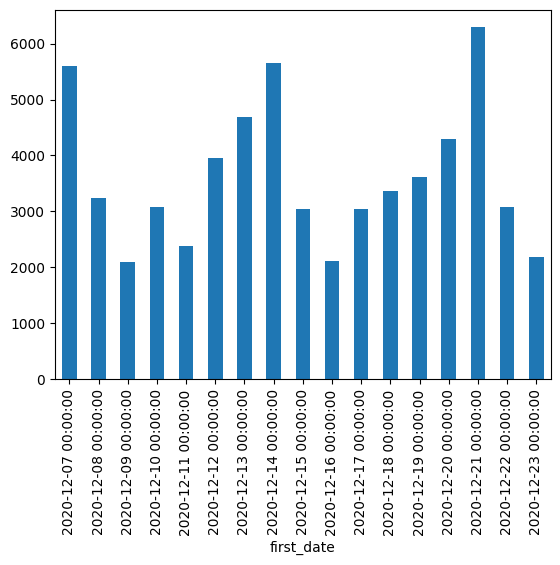

In [20]:
novosusuarios.groupby('first_date')['user_id'].count().plot(x = 'first_date', kind = 'bar')
plt.show()

Esta tabela mostra, por ordem de data, a quantidade de usuários que se cadastraram em cada dia. E depois foi plotado um gráfico de barras. Aqui é possível perceber a diferença da quantidade de cadastro nos diferentes dias. Por exemplo, o dia 21/12/2020 foi o dia com mais cadastros e o dia 16/12/2020 foi o dia com menos cadastros. Na descrição inicial foi descrito que dia 21/12/2020 era o dia que pararam de receber novos cadastros, porém de acordo com essa tabela ainda houve cadastros nos dias 22/12/2020 e 23/12/2020.

In [21]:
novosusuarios.groupby('region')['first_date'].count()

region
APAC          3153
CIS           3155
EU           46270
N.America     9155
Name: first_date, dtype: int64

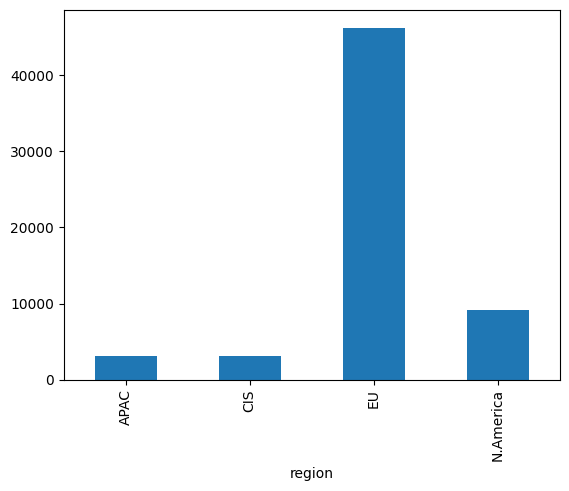

In [22]:
novosusuarios.groupby('region')['first_date'].count().plot(kind = 'bar')
plt.show()

Esta tabela mostra a quantidade de cadastros dividiso por região. E depois foi plotado em um gráfico de barras. Aqui é possível perceber a grande diferença entre a região EU e as demais regiões. Isso mostra, como comentado na descrição inicial de que existe um aumento de usuários na região EU.

In [23]:
novosusuarios.groupby('region')['device'].count()

region
APAC          3153
CIS           3155
EU           46270
N.America     9155
Name: device, dtype: int64

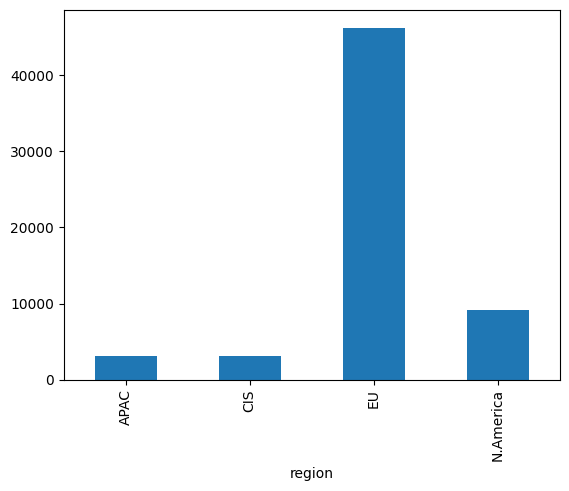

In [24]:
novosusuarios.groupby('region')['device'].count().plot(kind= 'bar')
plt.show()

Esta tabela mostra a quantidade de cada tipo de dispositivo por região. E depois foi plotado em um gráfico de barras. Aqui é possível perceber que o resultado é igual a tabela e gráfico anteorior, com a região EU muito maior que as demais regiões. Isso mostra a relação direta entre o usuário, a região e o dispositivo usado para o cadastro.

In [25]:
novosusuarios.groupby('device')['user_id'].count()

device
Android    27520
Mac         6084
PC         15599
iPhone     12530
Name: user_id, dtype: int64

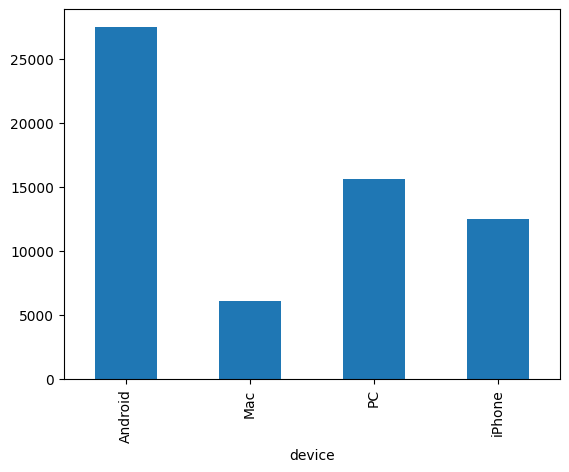

In [26]:
novosusuarios.groupby('device')['user_id'].count().plot(kind = 'bar')
plt.show()

Esta tabela mostra a quantidade de usuários divididos por tipo de dispositivo. E depois foi plotado em um gráfico de barras. Aqui mostra uma quantidade muito maior de usuários que se cadastram com o dispositivo Android, um equilibrio entre usuários que usam PC e IPhone e uma quantidade bem menor que se cadastram usando Mac.

In [27]:
novosusuarios['dia'] = novosusuarios['first_date'].dt.day

In [28]:
novosusuarios.head(10)

,user_id,first_date,region,device,dia
0,D72A72121175D8BE,2020-12-07,EU,PC,7
1,F1C668619DFE6E65,2020-12-07,N.America,Android,7
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC,7
3,50734A22C0C63768,2020-12-07,EU,iPhone,7
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone,7
5,137119F5A9E69421,2020-12-07,N.America,iPhone,7
6,62F0C741CC42D0CC,2020-12-07,APAC,iPhone,7
7,8942E64218C9A1ED,2020-12-07,EU,PC,7
8,499AFACF904BBAE3,2020-12-07,N.America,iPhone,7
9,FFCEA1179C253104,2020-12-07,EU,Android,7


In [29]:
novosusuarios.groupby('dia')['user_id'].count()

dia
7     5595
8     3239
9     2101
10    3076
11    2390
12    3963
13    4691
14    5654
15    3043
16    2110
17    3048
18    3365
19    3617
20    4288
21    6290
22    3083
23    2180
Name: user_id, dtype: int64

Nessa tabela, criamos uma coluna com o nome dia, separando o dia do mês que ocorreu o cadastro. E depois foi mostrado a quantidade de ocorrências por dia. É possível perceber que existe uma grande difereça entre os dias 

In [30]:
novosusuarios['user_id'].nunique()

61733

In [31]:
novosusuarios['region'].nunique()

4

In [32]:
novosusuarios['device'].nunique()

4

In [33]:
novosusuarios['region'].unique()

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

In [34]:
novosusuarios['device'].unique()

array(['PC', 'Android', 'iPhone', 'Mac'], dtype=object)

In [35]:
novosusuarios['first_date'].nunique()

17

In [36]:
novosusuarios['first_date'].unique()

array(['2020-12-07T00:00:00.000000000', '2020-12-14T00:00:00.000000000',
       '2020-12-21T00:00:00.000000000', '2020-12-08T00:00:00.000000000',
       '2020-12-15T00:00:00.000000000', '2020-12-22T00:00:00.000000000',
       '2020-12-09T00:00:00.000000000', '2020-12-16T00:00:00.000000000',
       '2020-12-23T00:00:00.000000000', '2020-12-10T00:00:00.000000000',
       '2020-12-17T00:00:00.000000000', '2020-12-11T00:00:00.000000000',
       '2020-12-18T00:00:00.000000000', '2020-12-12T00:00:00.000000000',
       '2020-12-19T00:00:00.000000000', '2020-12-13T00:00:00.000000000',
       '2020-12-20T00:00:00.000000000'], dtype='datetime64[ns]')

Esses códigos tem como resultados a quantidade de valores únicos em cada coluna e quais são eles (menos do user_id). Na coluna user_id temos 58703 valores únicos, o que mostra que não existe usuário com mais de um cadastro (o que comprova que realmente não tem valores duplicados).

In [37]:
soma_compra = novosusuarios.groupby(['region', 'device']).agg({'first_date' : 'count'})
print(soma_compra)

                   first_date
region    device             
APAC      Android        1401
          Mac             316
          PC              803
          iPhone          633
CIS       Android        1413
          Mac             310
          PC              776
          iPhone          656
EU        Android       20629
          Mac            4575
          PC            11693
          iPhone         9373
N.America Android        4077
          Mac             883
          PC             2327
          iPhone         1868


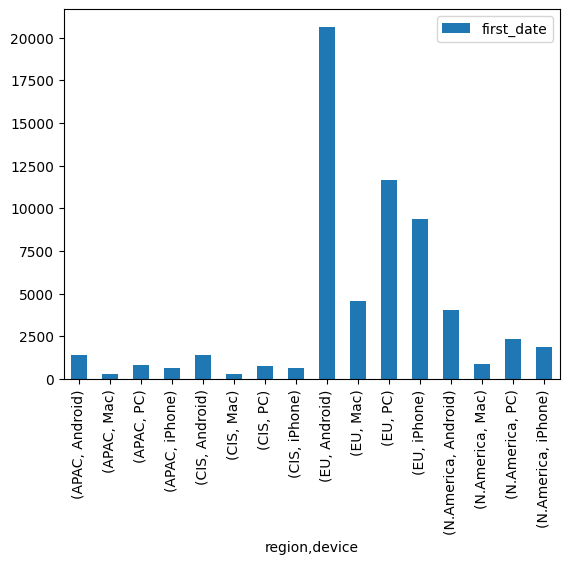

In [38]:
soma_compra.plot(kind = 'bar')
plt.show()

Esta tabela mostra a quantidade de cadastros por região em cada tipo de dispositivo. E depois foi plotado em um gráfico de barras, mostrando a diferença engtre cada linha. Com isso, é possível perceber que a quantidade de cadastro na região EU usando o dispositivo Android é muito maior que em todas as demais

Agora foi analiasado a tabela que contém todos os eventos dos novos usuários dentro do período de 7 de dezembro de 2020 até 1 de janeiro de 2021

In [39]:
eventos = pd.read_csv('/datasets/final_ab_events_upd_us.csv')

In [40]:
eventos.head(10)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,4.99
7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,4.99
8,B5FA27F582227197,2020-12-07 01:46:37,purchase,4.99
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99


In [41]:
eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [42]:
eventos['event_dt'] = pd.to_datetime(eventos['event_dt'], errors = 'coerce')

In [43]:
eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


A coluna event_dt está como tipo objeto. Porém, para que se possa trabalhar com datas é necessário converter a coluna para datetime.

In [44]:
eventos.isna().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

Nessa parte foi verificado uma possível existência de valores ausentes nas colunas. Tivemos como resultado que a coluna details tem 363447 valores ausentes, possivelmente por esses eventos não terem dados adicionais.

In [45]:
eventos_duplicated = eventos[eventos.duplicated()]
print(eventos_duplicated)

Empty DataFrame
Columns: [user_id, event_dt, event_name, details]
Index: []


Nessa parte foi verificado uma possível eixtência de valores duplicados nas colunas. Tivemos como resultado um DataFrame vazio, o que significa que não temos valores duplicados.

In [46]:
eventos['data'] = eventos['event_dt'].dt.date
eventos['hora'] = eventos['event_dt'].dt.time

In [47]:
eventos.head(10)

,user_id,event_dt,event_name,details,data,hora
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,20:22:03
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,09:22:53
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,12:59:29
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,04:02:40
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,10:15:09
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,06:50:29
6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,4.99,2020-12-07,11:27:42
7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,4.99,2020-12-07,04:26:15
8,B5FA27F582227197,2020-12-07 01:46:37,purchase,4.99,2020-12-07,01:46:37
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99,2020-12-07,00:32:07


Nesses códigos, pegamos a coluna event_dt e separamos a data do horário. Isso foi feito para facilitar a utilização dos valores, pois muitas vezes precisamos e utilizamos apenas as datas. Além de tornar os dados com menos detalhes e com isso, teoricamente, mais útil e com grupos de dados maiores (temos várias datas iguais, mas horários diferentes).

In [48]:
eventos.groupby('event_name').count()

,user_id,event_dt,details,data,hora
event_name,,,,,
login,182465,182465,0,182465,182465
product_cart,60120,60120,0,60120,60120
product_page,120862,120862,0,120862,120862
purchase,60314,60314,60314,60314,60314


Esta tabela mostra a quantidade de user_id, de event_dt, de details para cada evento. Nessa tabela é possível perceber que não existem valores de login, product_cart e product_page.

In [49]:
eventos.groupby('data')['event_name'].count()

data
2020-12-07    11385
2020-12-08    12547
2020-12-09    12122
2020-12-10    14077
2020-12-11    13864
2020-12-12    17634
2020-12-13    20985
2020-12-14    26184
2020-12-15    23469
2020-12-16    20909
2020-12-17    21751
2020-12-18    22871
2020-12-19    24273
2020-12-20    26425
2020-12-21    32559
2020-12-22    29472
2020-12-23    26108
2020-12-24    19399
2020-12-26    14058
2020-12-27    12420
2020-12-28    11014
2020-12-29    10146
2020-12-30       89
Name: event_name, dtype: int64

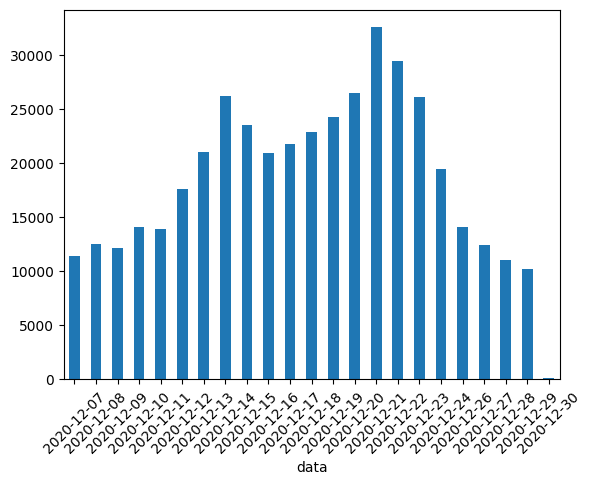

In [50]:
eventos.groupby('data')['event_name'].count().plot(kind = 'bar')
plt.xticks(rotation=45)
plt.show()

Neste código foi analisado a quantidade de eventos em cada data. E depois foi plotado em um gráfico de barras. Aqui é possível visualizar a evolução da quantidade de eventos por dia e podemos concluir que houve um pico de eventos no dia 21/12/2020, um crescimento ao longo dos dias e uma grande queda a partir do dia 23/12/2020.

In [51]:
eventos.groupby('data')['details'].count()

data
2020-12-07    1650
2020-12-08    1729
2020-12-09    1693
2020-12-10    2012
2020-12-11    1958
2020-12-12    2517
2020-12-13    3020
2020-12-14    3769
2020-12-15    3353
2020-12-16    3008
2020-12-17    3067
2020-12-18    3190
2020-12-19    3464
2020-12-20    3759
2020-12-21    4683
2020-12-22    4187
2020-12-23    3787
2020-12-24    2758
2020-12-26    1985
2020-12-27    1729
2020-12-28    1557
2020-12-29    1424
2020-12-30      15
Name: details, dtype: int64

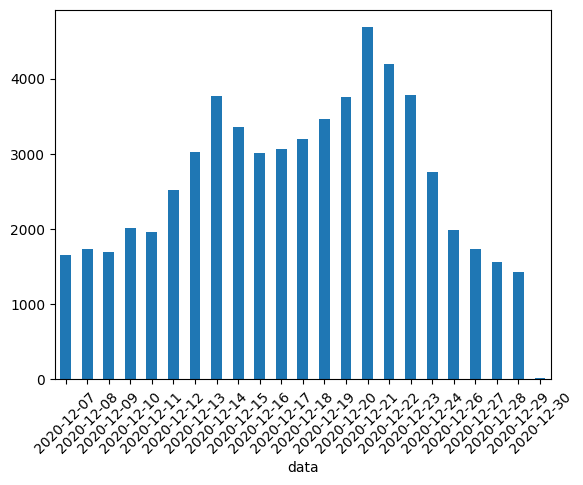

In [52]:
eventos.groupby('data')['details'].count().plot(kind = 'bar')
plt.xticks(rotation=45)
plt.show()

Neste código foi analisado a quantidade de dados adicionais em cada data. E depois foi plotado em um gráfico. Esse gráfico é muito parecido com o gráfico anterior, com um pico dia 21/12/2020 e uma queda nos dias seguintes.

In [53]:
evento_data = eventos.groupby('event_name').agg({'data' : 'count'})
print(evento_data)

                data
event_name          
login         182465
product_cart   60120
product_page  120862
purchase       60314


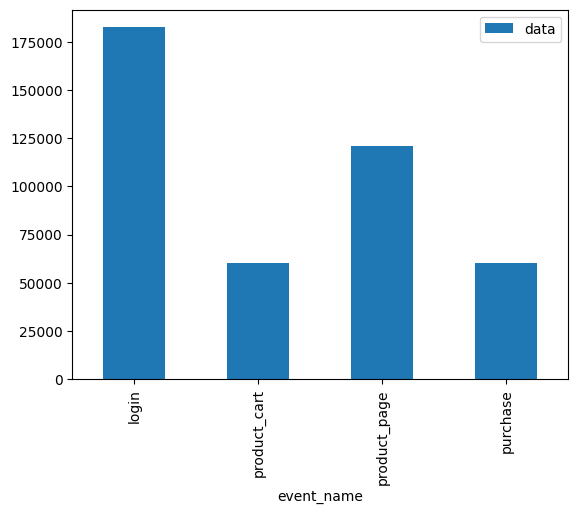

In [54]:
evento_data.plot(kind = 'bar')
plt.show()

Esta tabela mostra a quantidade de datas em cada tipo de evento. E depois foi plotado um gráfico de barra. Aqui é possível perceber uma quantidade muito maior de login, depois de product_page. Ou seja, a quantidade de usuários que fazem login e depois a quantidade de usuários que visualizam a página é bem maior do que efetivamente colocam no carrinho e compram.

Agora foi analisado a tabela contendo os participantes do teste

In [55]:
participantes = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

In [56]:
participantes.head(10)

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
5,7473E0943673C09E,A,recommender_system_test
6,C46FE336D240A054,A,recommender_system_test
7,92CB588012C10D3D,A,recommender_system_test
8,B3A2485649E4A012,A,recommender_system_test
9,66FC298441D50783,A,recommender_system_test


In [57]:
participantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [58]:
participantes.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

Nessa parte foi verificado uma possível exitência de valores ausentes nas colunas. Tivemos como resultado que não existem valores ausentes.

In [59]:
participantes_duplicated = participantes[participantes.duplicated()]
print(participantes_duplicated)

Empty DataFrame
Columns: [user_id, group, ab_test]
Index: []


Nessa parte foi verificado uma possível existência de valores duplicados nas colunas. Tivemos como resultados um DataFrame vazio, o que significa que não temos valores duplicados.

In [60]:
participantes['user_id'].nunique()

13638

In [61]:
participantes2 = participantes[participantes['user_id'].duplicated()]
print(participantes2)

                user_id group            ab_test
3677   FB6F6BC119E1DBD5     B  interface_eu_test
3688   055A4CD17A483B8E     A  interface_eu_test
3695   7060BB1CBE3BAACC     B  interface_eu_test
3711   8A26EBC1BA92524B     B  interface_eu_test
3730   A791C2D62B213C96     B  interface_eu_test
...                 ...   ...                ...
14433  7DF21AEB1AA231F9     B  interface_eu_test
14445  EA6EA431FF84563B     B  interface_eu_test
14470  70BF82527E6ED9C3     A  interface_eu_test
14487  EF2E4FAF26951358     A  interface_eu_test
14511  CA6F4DAED160E5B1     A  interface_eu_test

[887 rows x 3 columns]


In [62]:
participantes_unicos = participantes.drop_duplicates(subset='user_id', keep='first')
print(participantes_unicos)

                user_id group                  ab_test
0      D1ABA3E2887B6A73     A  recommender_system_test
1      A7A3664BD6242119     A  recommender_system_test
2      DABC14FDDFADD29E     A  recommender_system_test
3      04988C5DF189632E     A  recommender_system_test
4      4FF2998A348C484F     A  recommender_system_test
...                 ...   ...                      ...
14520  1D302F8688B91781     B        interface_eu_test
14521  3DE51B726983B657     A        interface_eu_test
14522  F501F79D332BE86C     A        interface_eu_test
14523  63FBE257B05F2245     A        interface_eu_test
14524  79F9ABFB029CF724     B        interface_eu_test

[13638 rows x 3 columns]


Foram identidicados que existeiam valores duplicados na coluna de user_id. Para que os demais testes não contem duas vezes o mesmo usuário, foram removidos esses valores de acordo com a data de ocorrência.

In [63]:
participantes.groupby('group')['ab_test'].count()

group
A    8214
B    6311
Name: ab_test, dtype: int64

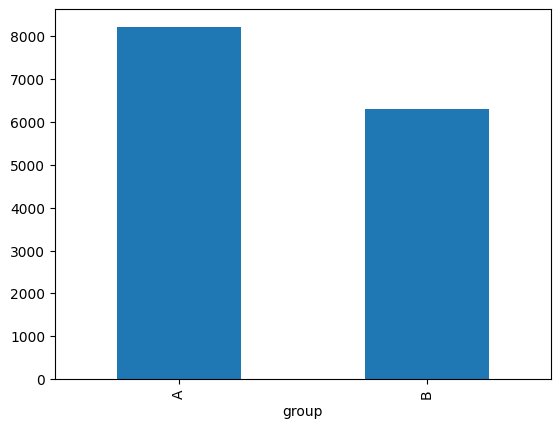

In [64]:
participantes.groupby('group')['ab_test'].count().plot(kind = 'bar')
plt.show()

Neste código foi analisado a quantidade em cada grupo de teste. E depois foi plotado em um gráfico de barras. Aqui é possível visualizar que a quantidade de eventos no grupo A (controle) é maior do que a do grupo B (experimento).

In [65]:
participantes.groupby('ab_test')['group'].count()

ab_test
interface_eu_test          10850
recommender_system_test     3675
Name: group, dtype: int64

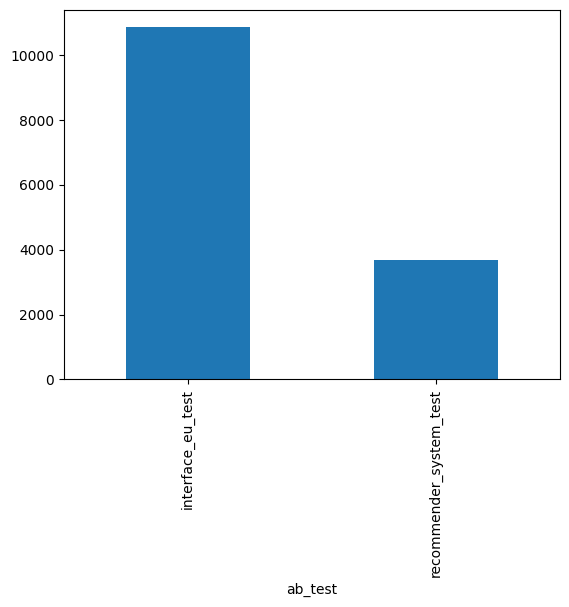

In [66]:
participantes.groupby('ab_test')['group'].count().plot(kind = 'bar')
plt.show()

Neste código foi analisado a quantidade de cada grupo para cada tipo de teste. E depois foi plotado em um gráfico. Aqui é possível verificar que a quantidade de teste de interface é muito maior do que o teste recomendado pelo sistema.

In [67]:
contagem = participantes.groupby(['ab_test', 'group']).size().unstack()
print(contagem)

group                       A     B
ab_test                            
interface_eu_test        5467  5383
recommender_system_test  2747   928


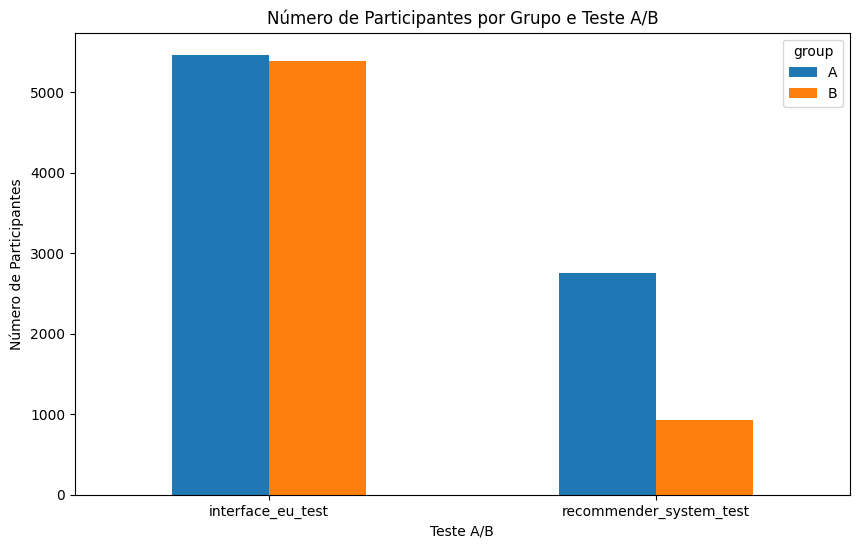

In [68]:
contagem.plot(kind='bar', figsize=(10, 6))
plt.title('Número de Participantes por Grupo e Teste A/B')
plt.xlabel('Teste A/B')
plt.ylabel('Número de Participantes')
plt.xticks(rotation=0)
plt.show()

In [69]:
for teste in participantes['ab_test'].unique():
    print(f'\nTeste {teste}:')
    print(participantes[participantes['ab_test'] == teste].groupby('group').size())


Teste recommender_system_test:
group
A    2747
B     928
dtype: int64

Teste interface_eu_test:
group
A    5467
B    5383
dtype: int64


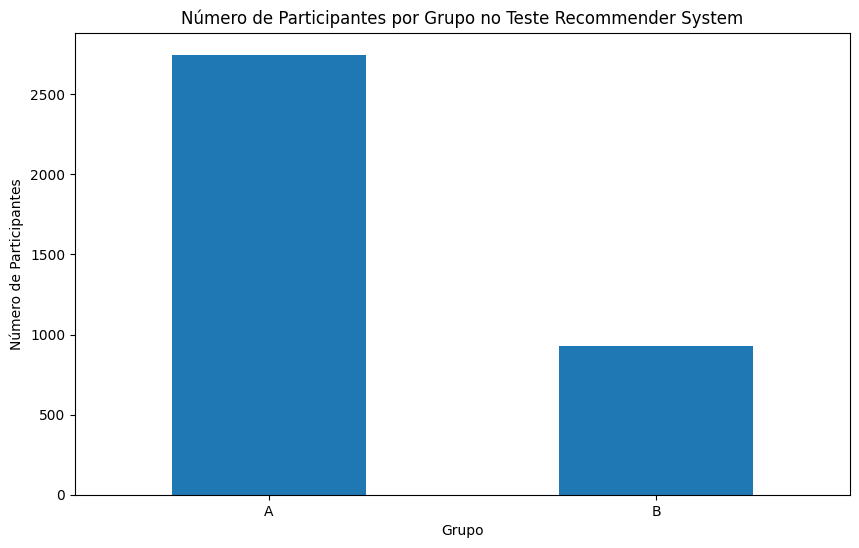

In [70]:
df_recommender = participantes[participantes['ab_test'] == 'recommender_system_test']
contagem_recommender = df_recommender.groupby('group').size()
contagem_recommender.plot(kind='bar', figsize=(10, 6))
plt.title('Número de Participantes por Grupo no Teste Recommender System')
plt.xlabel('Grupo')
plt.ylabel('Número de Participantes')
plt.xticks(rotation=0)
plt.show()

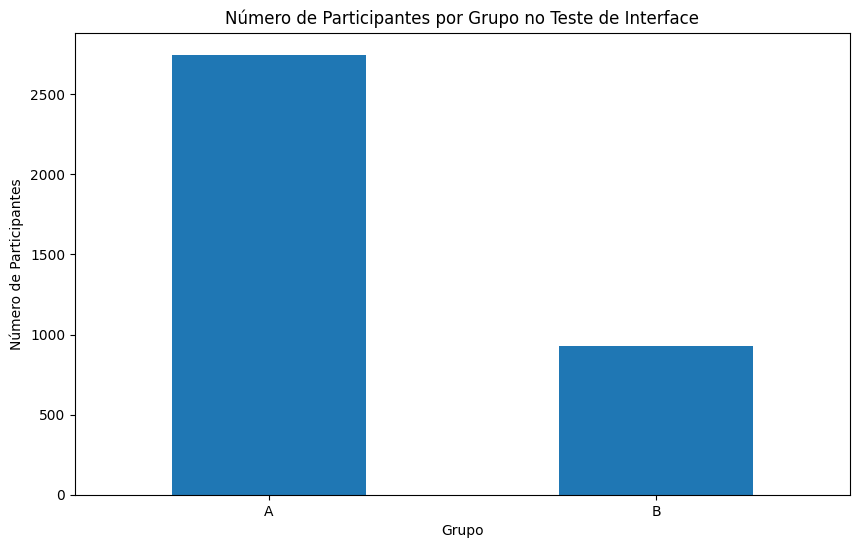

In [71]:
df_recommender2 = participantes[participantes['ab_test'] == 'interface_eu_test']
contagem_recommender = df_recommender.groupby('group').size()
contagem_recommender.plot(kind='bar', figsize=(10, 6))
plt.title('Número de Participantes por Grupo no Teste de Interface')
plt.xlabel('Grupo')
plt.ylabel('Número de Participantes')
plt.xticks(rotation=0)
plt.show()

Nessas tabelas e nesses gráficos foram analisados os grupos A e B separados por experimento. é possível perceber que no experimento de teste da interface, a diferença entre os participantes é pequena, enquanto no experimento a diferença recomendado pelo sistema, a diferença é muito grande

In [72]:
participantes_unicos.groupby('group')['ab_test'].count()

group
A    7758
B    5880
Name: ab_test, dtype: int64

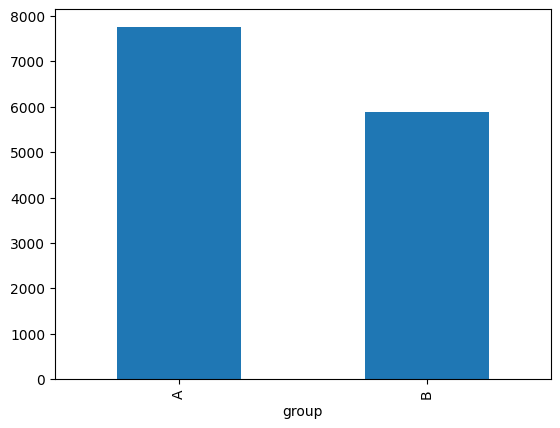

In [73]:
participantes_unicos.groupby('group')['ab_test'].count().plot(kind = 'bar')
plt.show()

In [74]:
participantes_unicos.groupby('ab_test')['group'].count()

ab_test
interface_eu_test          9963
recommender_system_test    3675
Name: group, dtype: int64

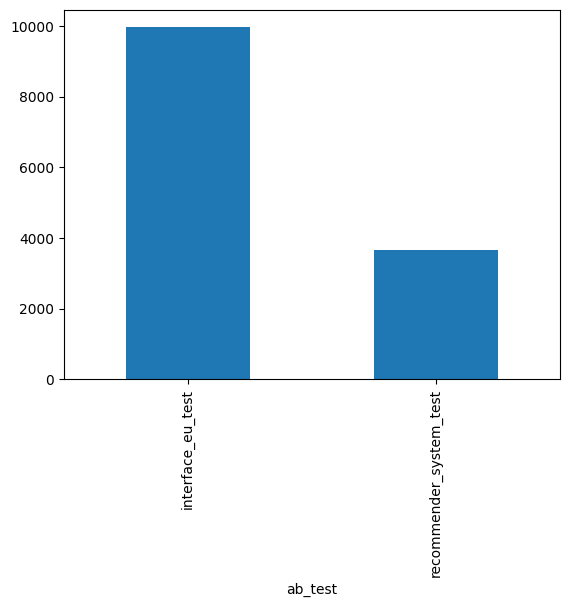

In [75]:
participantes_unicos.groupby('ab_test')['group'].count().plot(kind = 'bar')
plt.show()

Nessas tabelas e nesses gráficos foram analisados os grupos e os testes sem os user_id duplicados. Claculando a proporção antes e depois da remoção, ela ficou praticamente igual, o que mostra que, teoricamente, essa remoção não irá alterar o resultado final.

In [76]:
contagem_semduplicados = participantes_unicos.groupby(['ab_test', 'group']).size().unstack()
print(contagem_semduplicados)

group                       A     B
ab_test                            
interface_eu_test        5011  4952
recommender_system_test  2747   928


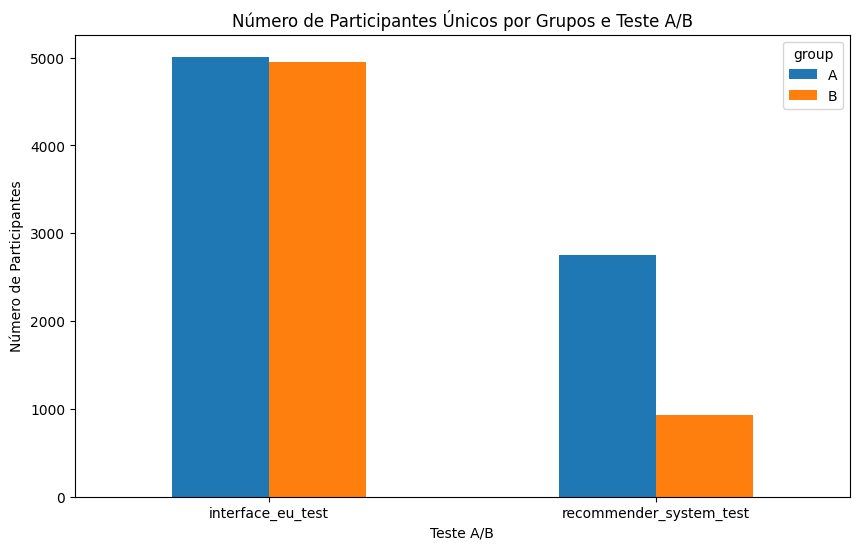

In [77]:
contagem_semduplicados.plot(kind = 'bar', figsize=(10, 6))
plt.title('Número de Participantes Únicos por Grupos e Teste A/B')
plt.xlabel('Teste A/B')
plt.ylabel('Número de Participantes')
plt.xticks(rotation=0)
plt.show()

In [78]:
for teste in participantes_unicos['ab_test'].unique():
    print(f'\teste {teste}:')
    print(participantes_unicos[participantes_unicos['ab_test'] == teste].groupby('group').size())

	este recommender_system_test:
group
A    2747
B     928
dtype: int64
	este interface_eu_test:
group
A    5011
B    4952
dtype: int64


In [79]:
participantes_unicos.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


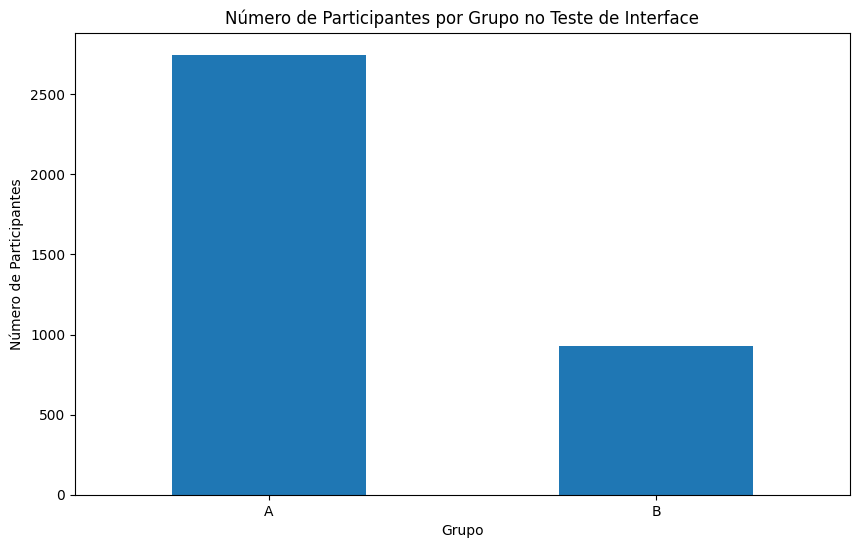

In [80]:
df_recommender_unico = participantes_unicos[participantes_unicos['ab_test'] == 'recommender_system_test']
contagem_recommender_unico = df_recommender_unico.groupby('group').size()
contagem_recommender_unico.plot(kind='bar', figsize=(10, 6))
plt.title('Número de Participantes por Grupo no Teste de Interface')
plt.xlabel('Grupo')
plt.ylabel('Número de Participantes')
plt.xticks(rotation=0)
plt.show()

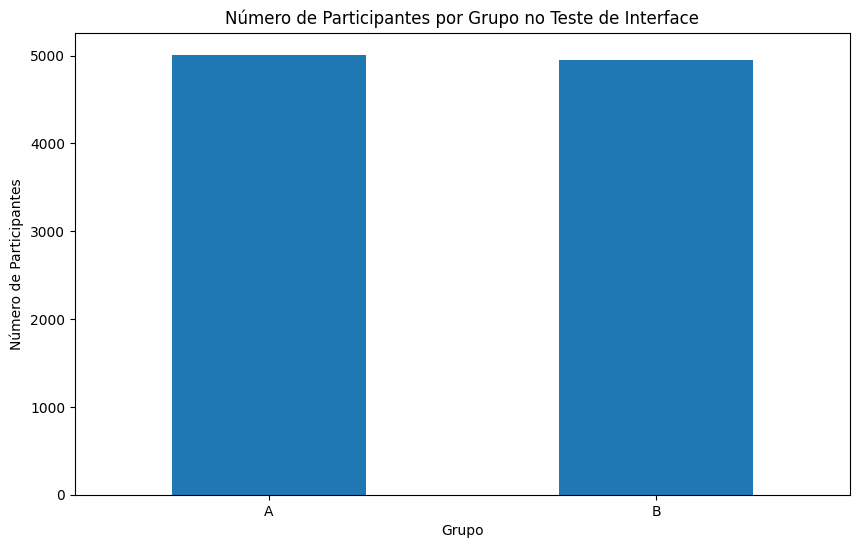

In [81]:
df_recommender_unico2 = participantes_unicos[participantes_unicos['ab_test'] == 'interface_eu_test']
contagem_recommender_unico2 = df_recommender_unico2.groupby('group').size()
contagem_recommender_unico2.plot(kind='bar', figsize=(10, 6))
plt.title('Número de Participantes por Grupo no Teste de Interface')
plt.xlabel('Grupo')
plt.ylabel('Número de Participantes')
plt.xticks(rotation=0)
plt.show()

Assim como nas tabelas e nos gráficos com valores duplicados, a diferença no teste recomendado pelo sistema, entre os grupos, é muito grande. Com isso, podemos deduzir que o teste foi feito em um pequeno grupo em relaçõ ao total. 

In [82]:
user_region = novosusuarios.merge(eventos, on = 'user_id', how = 'inner')
print(user_region.head(10))

            user_id first_date     region   device  dia            event_dt  \
0  D72A72121175D8BE 2020-12-07         EU       PC    7 2020-12-07 21:52:10   
1  D72A72121175D8BE 2020-12-07         EU       PC    7 2020-12-07 21:52:07   
2  F1C668619DFE6E65 2020-12-07  N.America  Android    7 2020-12-07 16:38:09   
3  F1C668619DFE6E65 2020-12-07  N.America  Android    7 2020-12-08 02:02:34   
4  F1C668619DFE6E65 2020-12-07  N.America  Android    7 2020-12-23 14:35:41   
5  F1C668619DFE6E65 2020-12-07  N.America  Android    7 2020-12-07 16:38:08   
6  F1C668619DFE6E65 2020-12-07  N.America  Android    7 2020-12-08 02:02:34   
7  F1C668619DFE6E65 2020-12-07  N.America  Android    7 2020-12-23 14:35:40   
8  2E1BF1D4C37EA01F 2020-12-07         EU       PC    7 2020-12-07 09:05:47   
9  2E1BF1D4C37EA01F 2020-12-07         EU       PC    7 2020-12-10 04:13:53   

     event_name  details        data      hora  
0  product_page      NaN  2020-12-07  21:52:10  
1         login      NaN  2020-1

Neste código foi feito uma união entre a tabela novosusuarios e a tabela eventos, através da coluna user_id.

In [83]:
tabelafinal = user_region.merge(participantes, on = 'user_id', how = 'inner')
print(tabelafinal.head(10))

            user_id first_date region device  dia            event_dt  \
0  D72A72121175D8BE 2020-12-07     EU     PC    7 2020-12-07 21:52:10   
1  D72A72121175D8BE 2020-12-07     EU     PC    7 2020-12-07 21:52:07   
2  2E1BF1D4C37EA01F 2020-12-07     EU     PC    7 2020-12-07 09:05:47   
3  2E1BF1D4C37EA01F 2020-12-07     EU     PC    7 2020-12-10 04:13:53   
4  2E1BF1D4C37EA01F 2020-12-07     EU     PC    7 2020-12-12 17:54:57   
5  2E1BF1D4C37EA01F 2020-12-07     EU     PC    7 2020-12-07 09:05:46   
6  2E1BF1D4C37EA01F 2020-12-07     EU     PC    7 2020-12-10 04:13:53   
7  2E1BF1D4C37EA01F 2020-12-07     EU     PC    7 2020-12-12 17:54:57   
8  2E1BF1D4C37EA01F 2020-12-07     EU     PC    7 2020-12-07 09:05:46   
9  2E1BF1D4C37EA01F 2020-12-07     EU     PC    7 2020-12-10 04:13:53   

     event_name  details        data      hora group                  ab_test  
0  product_page      NaN  2020-12-07  21:52:10     A  recommender_system_test  
1         login      NaN  2020-12-07

Neste código foi feito uma união entre a tabela formada no código anterior e a tabela participantes, através da coluna user_id.

In [84]:
tabelafinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102838 entries, 0 to 102837
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     102838 non-null  object        
 1   first_date  102838 non-null  datetime64[ns]
 2   region      102838 non-null  object        
 3   device      102838 non-null  object        
 4   dia         102838 non-null  int64         
 5   event_dt    102838 non-null  datetime64[ns]
 6   event_name  102838 non-null  object        
 7   details     14854 non-null   float64       
 8   data        102838 non-null  object        
 9   hora        102838 non-null  object        
 10  group       102838 non-null  object        
 11  ab_test     102838 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 10.2+ MB


In [85]:
tabelafinal['data'] = pd.to_datetime(tabelafinal['data'], errors = 'coerce')

In [86]:
tabelafinal['start_year'] = tabelafinal['data'].dt.to_period('Y')
tabelafinal['start_month'] = tabelafinal['data'].dt.to_period('M')
tabelafinal['start_week'] = tabelafinal['data'].dt.to_period('W')
tabelafinal['start_date'] = tabelafinal['data'].dt.date

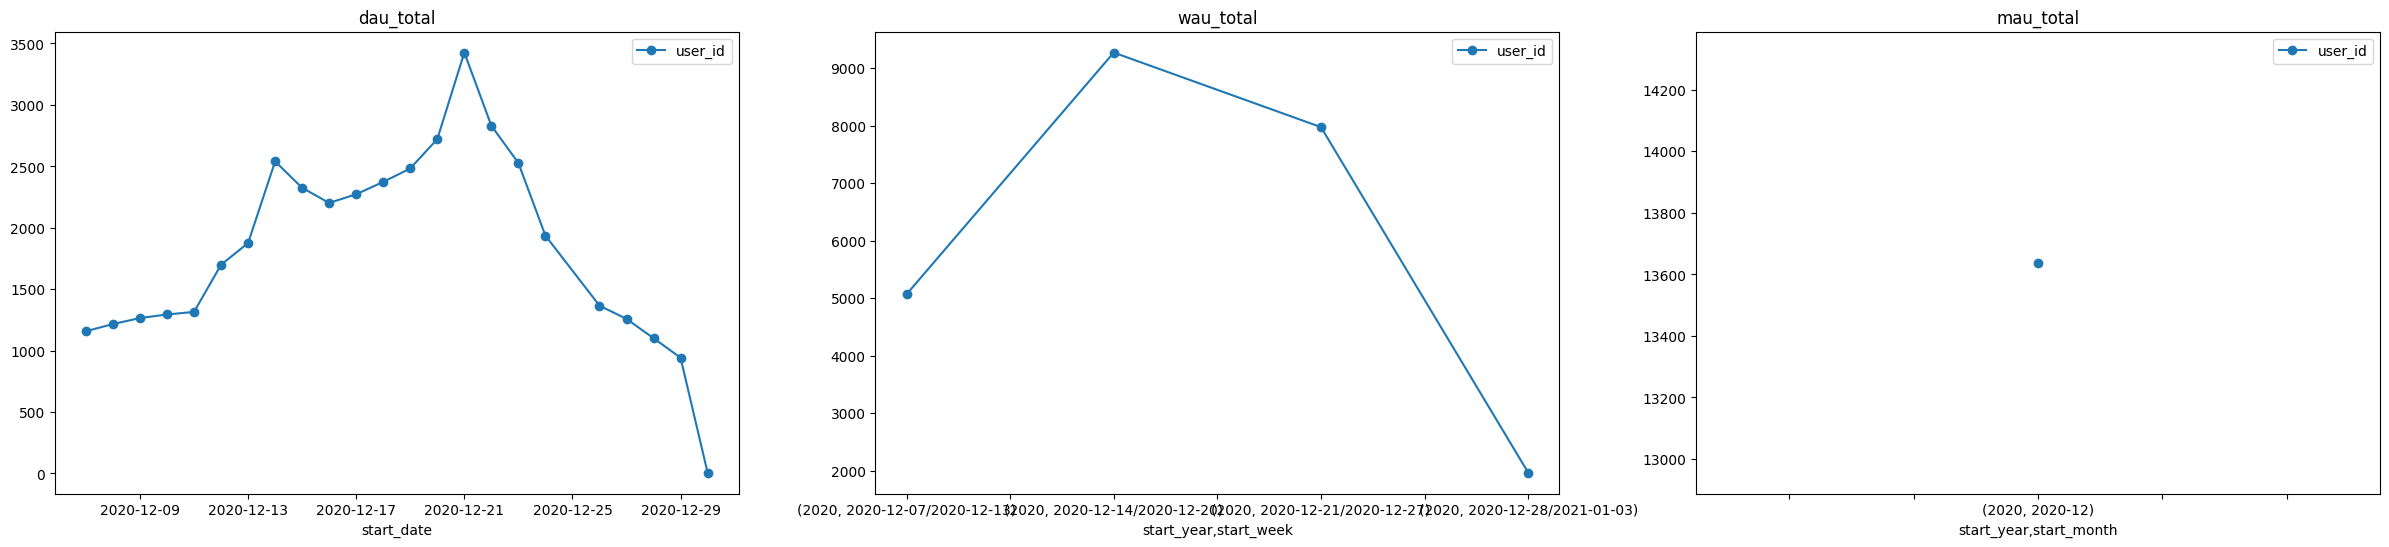

In [87]:
fig, ax = plt.subplots(1, 3, figsize = (30, 6))
dau_total = tabelafinal.groupby('start_date').agg({'user_id' : 'nunique'})
dau_total.plot(ax = ax[0], marker = 'o')
ax[0].set_title('dau_total')
wau_total = tabelafinal.groupby(['start_year', 'start_week']).agg({'user_id' : 'nunique'})
wau_total.plot(ax = ax[1], marker = 'o')
ax[1].set_title('wau_total')
mau_total = tabelafinal.groupby(['start_year', 'start_month']).agg({'user_id' : 'nunique'})
mau_total.plot(ax = ax[2], marker = 'o')
ax[2].set_title('mau_total');

Nesses códigos e gráficos foram mostrados a quantidade de usuários efetivos por mês, por semana e por dia. Aqui podemos ver que o formato é bem diferente (no ano só tem um ponto, pois é só um ano). O gráfico de data e de semana tem bastante diferenças porque existem uma variação grande entre o que acontece entre os dias e o que acontece entre as semanas.

In [88]:
day_visit = tabelafinal.groupby('start_date').agg({'user_id' : ['count', 'nunique']})
day_visit.columns = ['n_events', 'n_user']
day_visit['day_visit'] = day_visit['n_events'] / day_visit['n_user']
print(day_visit)

            n_events  n_user  day_visit
start_date                             
2020-12-07      2777    1158   2.398100
2020-12-08      2904    1216   2.388158
2020-12-09      3079    1265   2.433992
2020-12-10      3164    1294   2.445131
2020-12-11      3145    1315   2.391635
2020-12-12      4040    1699   2.377869
2020-12-13      4478    1876   2.386994
2020-12-14      6138    2540   2.416535
2020-12-15      5649    2325   2.429677
2020-12-16      5470    2202   2.484105
2020-12-17      5663    2273   2.491421
2020-12-18      5803    2373   2.445428
2020-12-19      6170    2483   2.484897
2020-12-20      6676    2722   2.452608
2020-12-21      8511    3426   2.484238
2020-12-22      6858    2831   2.422466
2020-12-23      6108    2527   2.417095
2020-12-24      4732    1936   2.444215
2020-12-26      3366    1366   2.464129
2020-12-27      3087    1258   2.453895
2020-12-28      2719    1101   2.469573
2020-12-29      2281     942   2.421444
2020-12-30        20       7   2.857143


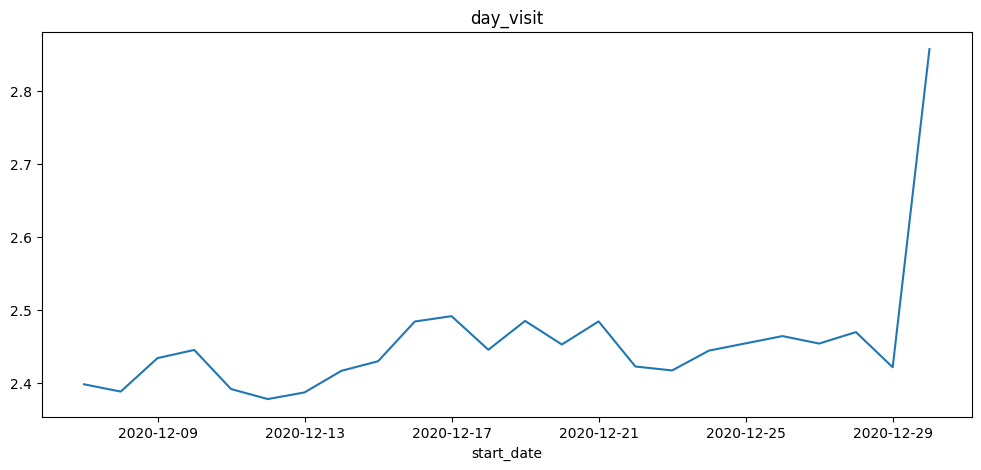

In [89]:
plt.figure(figsize = (12, 5))
day_visit['day_visit'].plot().set(title = 'day_visit');

Nesse código mostramos a média de eventos por usuário em cada dia. Como nos últimos dias ocorrem poucos eventos, a média acaba tendo um grande pico.

In [90]:
first_event = tabelafinal.groupby('user_id').agg({'start_month' : 'min'}).reset_index().rename(columns = {'start_month' : 'first_month'})
first_event.head(10)

,user_id,first_month
0,0002CE61FF2C4011,2020-12
1,001064FEAAB631A1,2020-12
2,0010A1C096941592,2020-12
3,001E72F50D1C48FA,2020-12
4,002412F1EB3F6E38,2020-12
5,002540BE89C930FB,2020-12
6,0031F1B5E9FBF708,2020-12
7,003346BB64227D0C,2020-12
8,00341D8401F0F665,2020-12
9,0036BE15EE4D319D,2020-12


In [91]:
event_first_day = tabelafinal.merge(first_event, on = 'user_id')
print(event_first_day.head(10))

            user_id first_date region device  dia            event_dt  \
0  D72A72121175D8BE 2020-12-07     EU     PC    7 2020-12-07 21:52:10   
1  D72A72121175D8BE 2020-12-07     EU     PC    7 2020-12-07 21:52:07   
2  2E1BF1D4C37EA01F 2020-12-07     EU     PC    7 2020-12-07 09:05:47   
3  2E1BF1D4C37EA01F 2020-12-07     EU     PC    7 2020-12-10 04:13:53   
4  2E1BF1D4C37EA01F 2020-12-07     EU     PC    7 2020-12-12 17:54:57   
5  2E1BF1D4C37EA01F 2020-12-07     EU     PC    7 2020-12-07 09:05:46   
6  2E1BF1D4C37EA01F 2020-12-07     EU     PC    7 2020-12-10 04:13:53   
7  2E1BF1D4C37EA01F 2020-12-07     EU     PC    7 2020-12-12 17:54:57   
8  2E1BF1D4C37EA01F 2020-12-07     EU     PC    7 2020-12-07 09:05:46   
9  2E1BF1D4C37EA01F 2020-12-07     EU     PC    7 2020-12-10 04:13:53   

     event_name  details       data      hora group                  ab_test  \
0  product_page      NaN 2020-12-07  21:52:10     A  recommender_system_test   
1         login      NaN 2020-12-07 

In [92]:
event_first_day['month_diff'] = event_first_day['start_month'].astype('int64') - event_first_day['first_month'].astype('int64')

In [93]:
event_first_day.head(10)

,user_id,first_date,region,device,dia,event_dt,event_name,details,data,hora,group,ab_test,start_year,start_month,start_week,start_date,first_month,month_diff
0,D72A72121175D8BE,2020-12-07,EU,PC,7,2020-12-07 21:52:10,product_page,NaN,2020-12-07,21:52:10,A,recommender_system_test,2020,2020-12,2020-12-07/2020-12-13,2020-12-07,2020-12,0
1,D72A72121175D8BE,2020-12-07,EU,PC,7,2020-12-07 21:52:07,login,NaN,2020-12-07,21:52:07,A,recommender_system_test,2020,2020-12,2020-12-07/2020-12-13,2020-12-07,2020-12,0
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC,7,2020-12-07 09:05:47,product_cart,NaN,2020-12-07,09:05:47,A,interface_eu_test,2020,2020-12,2020-12-07/2020-12-13,2020-12-07,2020-12,0
3,2E1BF1D4C37EA01F,2020-12-07,EU,PC,7,2020-12-10 04:13:53,product_cart,NaN,2020-12-10,04:13:53,A,interface_eu_test,2020,2020-12,2020-12-07/2020-12-13,2020-12-10,2020-12,0
4,2E1BF1D4C37EA01F,2020-12-07,EU,PC,7,2020-12-12 17:54:57,product_cart,NaN,2020-12-12,17:54:57,A,interface_eu_test,2020,2020-12,2020-12-07/2020-12-13,2020-12-12,2020-12,0
5,2E1BF1D4C37EA01F,2020-12-07,EU,PC,7,2020-12-07 09:05:46,product_page,NaN,2020-12-07,09:05:46,A,interface_eu_test,2020,2020-12,2020-12-07/2020-12-13,2020-12-07,2020-12,0
6,2E1BF1D4C37EA01F,2020-12-07,EU,PC,7,2020-12-10 04:13:53,product_page,NaN,2020-12-10,04:13:53,A,interface_eu_test,2020,2020-12,2020-12-07/2020-12-13,2020-12-10,2020-12,0
7,2E1BF1D4C37EA01F,2020-12-07,EU,PC,7,2020-12-12 17:54:57,product_page,NaN,2020-12-12,17:54:57,A,interface_eu_test,2020,2020-12,2020-12-07/2020-12-13,2020-12-12,2020-12,0
8,2E1BF1D4C37EA01F,2020-12-07,EU,PC,7,2020-12-07 09:05:46,login,NaN,2020-12-07,09:05:46,A,interface_eu_test,2020,2020-12,2020-12-07/2020-12-13,2020-12-07,2020-12,0
9,2E1BF1D4C37EA01F,2020-12-07,EU,PC,7,2020-12-10 04:13:53,login,NaN,2020-12-10,04:13:53,A,interface_eu_test,2020,2020-12,2020-12-07/2020-12-13,2020-12-10,2020-12,0


In [94]:
retention_event = event_first_day.pivot_table(
    index = 'first_month',
    columns = 'month_diff',
    values = 'user_id',
    aggfunc = 'nunique')
retention_event.fillna('')

month_diff,0
first_month,
2020-12,13638


Aqui foi criado uma tabela de retenção dos usuários através do mês inicial e o intervalo entre os eventos.

In [95]:
first_cadastro = tabelafinal.groupby('user_id').agg({'first_date' : 'min'}).reset_index().rename(columns = {'first_date' : 'first_purchase'})
first_cadastro.head(10)

,user_id,first_purchase
0,0002CE61FF2C4011,2020-12-07
1,001064FEAAB631A1,2020-12-20
2,0010A1C096941592,2020-12-17
3,001E72F50D1C48FA,2020-12-17
4,002412F1EB3F6E38,2020-12-09
5,002540BE89C930FB,2020-12-08
6,0031F1B5E9FBF708,2020-12-14
7,003346BB64227D0C,2020-12-17
8,00341D8401F0F665,2020-12-21
9,0036BE15EE4D319D,2020-12-21


Esta tabela mostra qual foi a data de cadastro de cada usuário.

Conclusão antes do teste A/B:
- é possível perceber a diferença entre os grupos (controle e teste), as diferença do nome do teste
- é preciso entender como/e se a região pode afetar o teste
- é preciso entender como/e se o tipo de dispositivo utilizado pode afetar o teste
- por que existe cadastro depois do dia que foi definido como último dia
- a fonte do evento pode afetar o teste

# Avalie os resultados do teste A/B 

In [96]:
participantes.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [97]:
eventos.head()

,user_id,event_dt,event_name,details,data,hora
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,20:22:03
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,09:22:53
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,12:59:29
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,04:02:40
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,10:15:09


Primeiramente demos uma olhada novamente nas tabelas com os dados dos participantes e os eventos.

In [98]:
participanteseventos = participantes.merge(eventos, on = 'user_id')

In [99]:
participanteseventos.head()

,user_id,group,ab_test,event_dt,event_name,details,data,hora
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,14:43:27
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,NaN,2020-12-07,14:43:29
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,NaN,2020-12-07,14:43:27
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,NaN,2020-12-07,14:43:27
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,NaN,2020-12-20,15:46:06


Aqui foi feito uma união entre essas duas tabelas através da coluna user_id.

In [100]:
participanteseventos['group'].value_counts()

A    58705
B    44133
Name: group, dtype: int64

Neste código foi analisado a quantidade de usuários em cada grupo.

In [101]:
datesGroups = participanteseventos[['data', 'group']].drop_duplicates()
eventosAggregated = datesGroups.apply(lambda x: participanteseventos[np.logical_and(participanteseventos['data'] <= x['data'], participanteseventos['group'] == x['group'])].agg({'data' : 'max', 'group' : 'max', 'user_id' : pd.Series.nunique, 'details' : 'sum'}), axis=1).sort_values(by=['data', 'group'])

participantesAggregated = datesGroups.apply(lambda x: participanteseventos[np.logical_and(participanteseventos['data'] <= x['data'], participanteseventos['group'] == x['group'])].agg({'data' : 'max', 'group' : 'max'}), axis=1).sort_values(by=['data', 'group'])
print(eventosAggregated.head())
print(participantesAggregated.head())

           data group  user_id   details
0    2020-12-07     A      598   5177.99
105  2020-12-07     B      609   6852.87
8    2020-12-08     A      967   9860.93
219  2020-12-08     B      938  11005.81
60   2020-12-09     A     1250  16003.69
           data group
0    2020-12-07     A
105  2020-12-07     B
8    2020-12-08     A
219  2020-12-08     B
60   2020-12-09     A


In [102]:
cumulativeData = eventosAggregated.merge(participantesAggregated, on = ['data', 'group'])
cumulativeData.columns = ['data', 'group', 'user_id', 'details']
print(cumulativeData.head())

         data group  user_id   details
0  2020-12-07     A      598   5177.99
1  2020-12-07     B      609   6852.87
2  2020-12-08     A      967   9860.93
3  2020-12-08     B      938  11005.81
4  2020-12-09     A     1250  16003.69


In [103]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A'][['data', 'details', 'user_id']]
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B'][['data', 'details', 'user_id']]

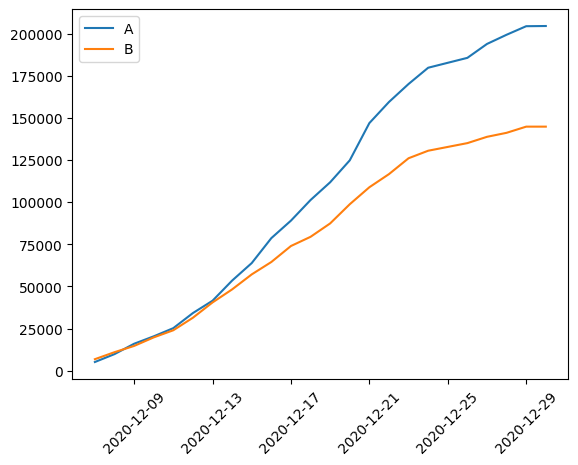

In [104]:
plt.plot(cumulativeDataA['data'], cumulativeDataA['details'], label = 'A')
plt.plot(cumulativeDataB['data'], cumulativeDataB['details'], label = 'B')
plt.xticks(rotation=45) 
plt.legend()

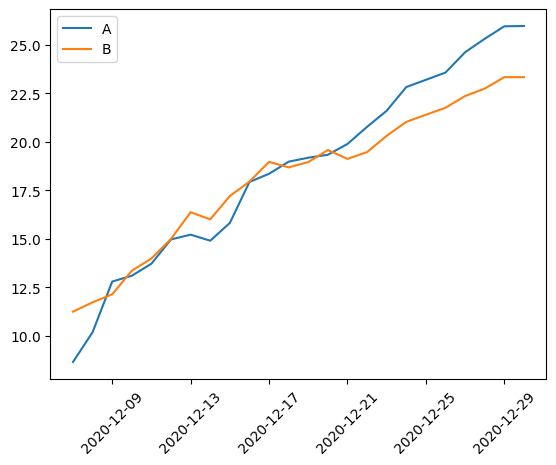

In [105]:
plt.plot(cumulativeDataA['data'], cumulativeDataA['details']/cumulativeDataA['user_id'], label = 'A')
plt.plot(cumulativeDataB['data'], cumulativeDataB['details']/cumulativeDataB['user_id'], label = 'B')
plt.xticks(rotation=45)
plt.legend()

In [106]:
mergecumulativeData = cumulativeDataA.merge(cumulativeDataB, on = 'data', how = 'left', suffixes = ['A', 'B'])

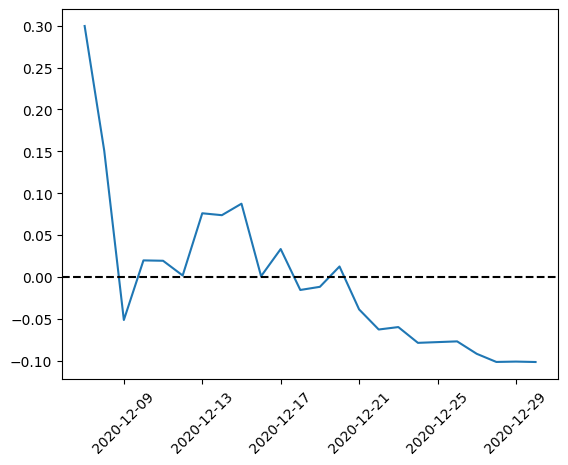

In [107]:
plt.plot(mergecumulativeData['data'], (mergecumulativeData['detailsB']/mergecumulativeData['user_idB'])/(mergecumulativeData['detailsA']/mergecumulativeData['user_idA']) - 1)
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')

In [108]:
cumulativeData.head()

,data,group,user_id,details
0,2020-12-07,A,598,5177.99
1,2020-12-07,B,609,6852.87
2,2020-12-08,A,967,9860.93
3,2020-12-08,B,938,11005.81
4,2020-12-09,A,1250,16003.69


In [109]:
ordersByUsers = (participanteseventos.drop(['group', 'details', 'data'], axis=1)
                                  .groupby('user_id')
                                  .size()
                                  .reset_index(name='orders'))

# Renomeando a coluna 'user_id' para 'userid'
ordersByUsers.rename(columns={'user_id': 'userid'}, inplace=True)

# Exibindo os 15 usuários com mais pedidos
print(ordersByUsers.sort_values(by='orders', ascending=False).head(15))

                 userid  orders
5681   6B1D0D8C4F8FBBEC      40
7090   84DC74ED5E60BA6A      40
23     0082295A41A867B5      40
2283   2B8FD20CA8A2A616      40
1276   18569C8DCB0771B6      40
8235   9A5549A4A85FCF06      38
3477   41FA2525E7869F35      36
8618   A1C3D3C6C3CADDC5      36
9401   B0244412983000C5      36
7232   87A8BCBB07EBDACA      36
10634  C8460FF8BEF553A4      36
10617  C7D1A5A6F6BAD476      36
11586  D9C92EC5F9478381      32
2905   37094134968B2013      32
10253  C165E8C0C5DE19FF      32


In [110]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[16. 24.]


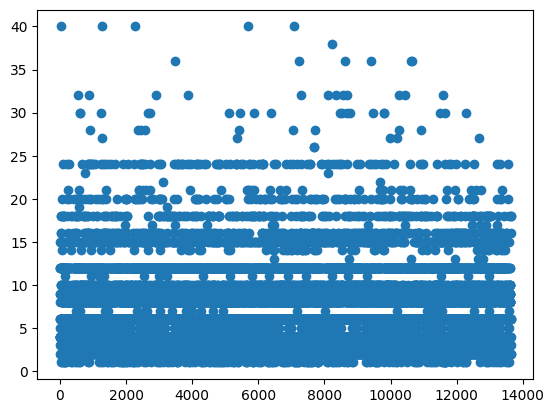

In [111]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

In [112]:
ordersByUsersA = participanteseventos[participanteseventos['group'] == 'A'].groupby('user_id', as_index=False)
ordersByUsersA.columns = ['userId', 'orders']
print(ordersByUsersA.head())

                 user_id group                  ab_test            event_dt  \
0       D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07 14:43:27   
1       D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07 14:43:29   
2       D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07 14:43:27   
3       D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07 14:43:27   
4       A7A3664BD6242119     A  recommender_system_test 2020-12-20 15:46:06   
...                  ...   ...                      ...                 ...   
102824  F501F79D332BE86C     A        interface_eu_test 2020-12-20 11:22:53   
102825  F501F79D332BE86C     A        interface_eu_test 2020-12-21 18:21:31   
102826  F501F79D332BE86C     A        interface_eu_test 2020-12-22 20:01:03   
102832  63FBE257B05F2245     A        interface_eu_test 2020-12-20 05:49:01   
102833  63FBE257B05F2245     A        interface_eu_test 2020-12-23 13:03:17   

          event_name  details        data      hora

In [113]:
ordersByUsersB = participanteseventos[participanteseventos['group'] == 'B'].groupby('user_id', as_index=False)
ordersByUsersB.columns = ['userId', 'orders']
print(ordersByUsersB.head())

                 user_id group                  ab_test            event_dt  \
78      CD74C3D22FFC09C2     B  recommender_system_test 2020-12-21 14:10:54   
79      CD74C3D22FFC09C2     B  recommender_system_test 2020-12-22 11:22:05   
80      CD74C3D22FFC09C2     B  recommender_system_test 2020-12-28 18:43:12   
81      CD74C3D22FFC09C2     B  recommender_system_test 2020-12-21 14:10:51   
82      CD74C3D22FFC09C2     B  recommender_system_test 2020-12-22 11:22:03   
...                  ...   ...                      ...                 ...   
102809  1D302F8688B91781     B        interface_eu_test 2020-12-16 08:13:19   
102834  79F9ABFB029CF724     B        interface_eu_test 2020-12-14 19:12:49   
102835  79F9ABFB029CF724     B        interface_eu_test 2020-12-15 01:50:22   
102836  79F9ABFB029CF724     B        interface_eu_test 2020-12-16 19:27:36   
102837  79F9ABFB029CF724     B        interface_eu_test 2020-12-20 13:04:31   

          event_name  details        data      hora

In [114]:
user_event = participanteseventos.drop_duplicates(subset = 'user_id')
contingency = pd.crosstab(participanteseventos['event_name'], participanteseventos['group'])
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=15.883106729385325, pvalue=0.001198305525586909, dof=3, expected_freq=array([[25519.81782026, 19185.18217974],
       [ 8173.42023377,  6144.57976623],
       [16532.36648904, 12428.63351096],
       [ 8479.39545693,  6374.60454307]]))

In [115]:
participanteseventos_cleaned = participanteseventos.dropna()
ttest_ind(participanteseventos_cleaned.query('group == "B"')['details'], participanteseventos_cleaned.query('group == "A"')['details'])

Ttest_indResult(statistic=-0.4216954222845574, pvalue=0.6732534493930711)

Em todos esses códigos foram analisados como os grupos se comportam ao longo do tempo. É possível perceber uma diferença, no gráfico entre os grupos. No início eles estão parecidos, porém no final apareta que o crescimento do grupo A é maior do que no grupo B. Já na parte final, eliminando as linhas com valores ausentes, calculamos o p-value e ele mostra um valor muito acima do alpha = 0.05.

In [116]:
print(f"""
Quantidade de eventos: {len(participanteseventos_cleaned)}
Eventos por tipo: {participanteseventos_cleaned.groupby('event_name')['user_id'].count()}
Usuário únicos: {participanteseventos_cleaned['user_id'].nunique()}
Média de eventos por usuário:{round(len(participanteseventos_cleaned) / participanteseventos_cleaned['user_id'].nunique(), 4)}
""")


Quantidade de eventos: 14854
Eventos por tipo: event_name
purchase    14854
Name: user_id, dtype: int64
Usuário únicos: 4563
Média de eventos por usuário:3.2553



In [117]:
print(f"""
Quantidade de eventos: {len(participanteseventos)}
Eventos por tipo: {participanteseventos.groupby('event_name')['user_id'].count()}
Usuário únicos: {participanteseventos['user_id'].nunique()}
Média de eventos por usuário:{round(len(participanteseventos) / participanteseventos['user_id'].nunique(), 4)}
""")


Quantidade de eventos: 102838
Eventos por tipo: event_name
login           44705
product_cart    14318
product_page    28961
purchase        14854
Name: user_id, dtype: int64
Usuário únicos: 13638
Média de eventos por usuário:7.5405



Neste código vemos a quantidade total de eventos, a quantidade por tipo de evento, a quantidade de usuários únicos e a média de eventos por usuário. Aqui também podemos comparar os resultados com ou sem valores ausentes.

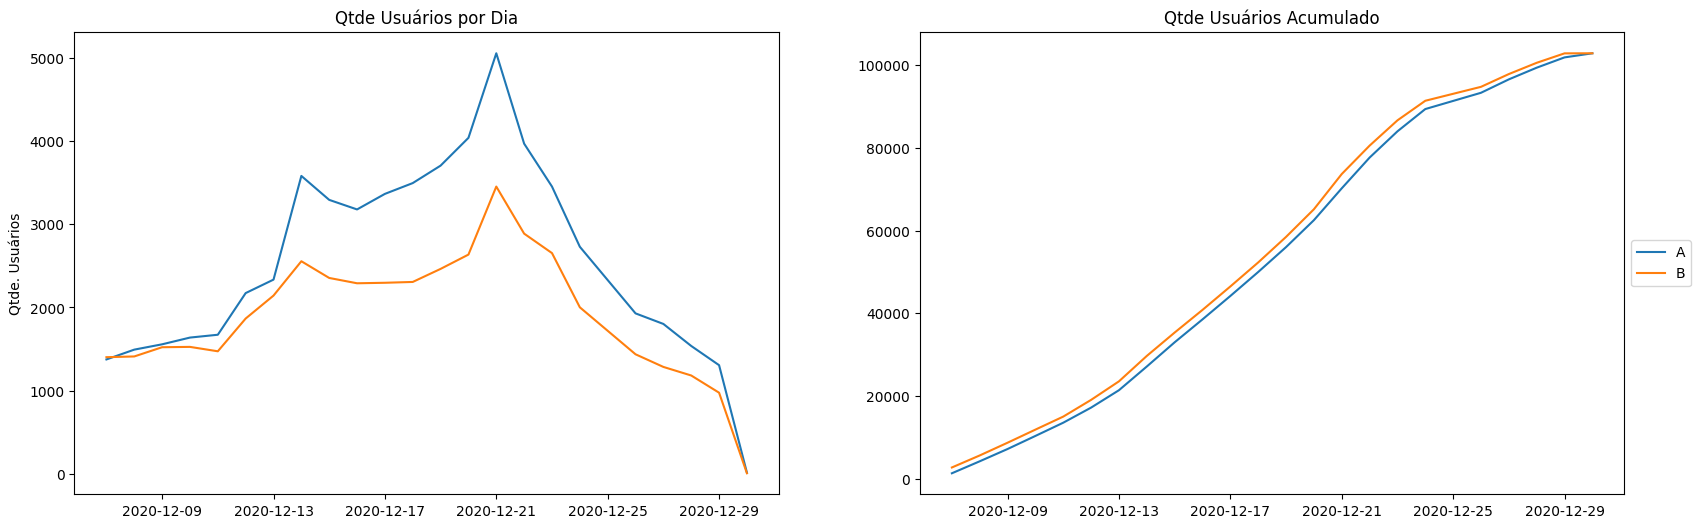

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.lineplot(x = 'data',
             y = 'user_id',
             hue = 'group',
             data = participanteseventos.groupby(["data", 'group'])["user_id"].count().reset_index(),
             ax = ax[0]);
sns.lineplot(x = 'data',
             y = 'user_id',
             hue = 'group',
             data = participanteseventos.groupby(["data", 'group'])["user_id"].count().cumsum().reset_index(),
             ax = ax[1]);

[plot.set_xlabel("") for plot in ax]

ax[0].set_ylabel("Qtde. Usuários")
ax[1].set_ylabel("")

ax[0].set_title("Qtde Usuários por Dia")
ax[1].set_title("Qtde Usuários Acumulado");

ax[0].get_legend().remove()
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5));

Nesses gráficos mostramos a quantidade de usuários por dia e o acumulado, comparando os dois grupos. Observando esses gráficos é possível perceber que o acumulado é parecido o crescimento, porém o por dia, a curva é bem diferente, tendo um pico bem maior no grupo A.

In [119]:
users_by_event = participanteseventos.groupby("event_name")["user_id"].nunique().sort_values(ascending=False).reset_index()
users_by_event["users_in_previous_step"] = users_by_event["user_id"].shift(1)
users_by_event["conversion_previous_step"] = users_by_event["user_id"] / users_by_event["users_in_previous_step"]
users_by_event["dropoff_rate"] = 1 - users_by_event["conversion_previous_step"]

users_by_event.head()

,event_name,user_id,users_in_previous_step,conversion_previous_step,dropoff_rate
0,login,13636,NaN,NaN,NaN
1,product_page,8923,13636.0,0.654371,0.345629
2,purchase,4563,8923.0,0.511375,0.488625
3,product_cart,4394,4563.0,0.962963,0.037037


Aqui comparamos a quantidade de user_id entre as etapas e a porcentagem de usuários que continuam e os que saem.

In [120]:
experiment_lauch8 = pd.to_datetime('2020-12-21').date()
participanteseventos['data'] = pd.to_datetime(participanteseventos['data']).dt.date

pre_experiment_data8 = participanteseventos[participanteseventos['data'] < experiment_lauch8]
pre_experiment_data8.groupby('group').agg({'details': 'mean', 'user_id': 'count'}).reset_index()

,group,details,user_id
0,A,23.102387,36906
1,B,24.909273,28250


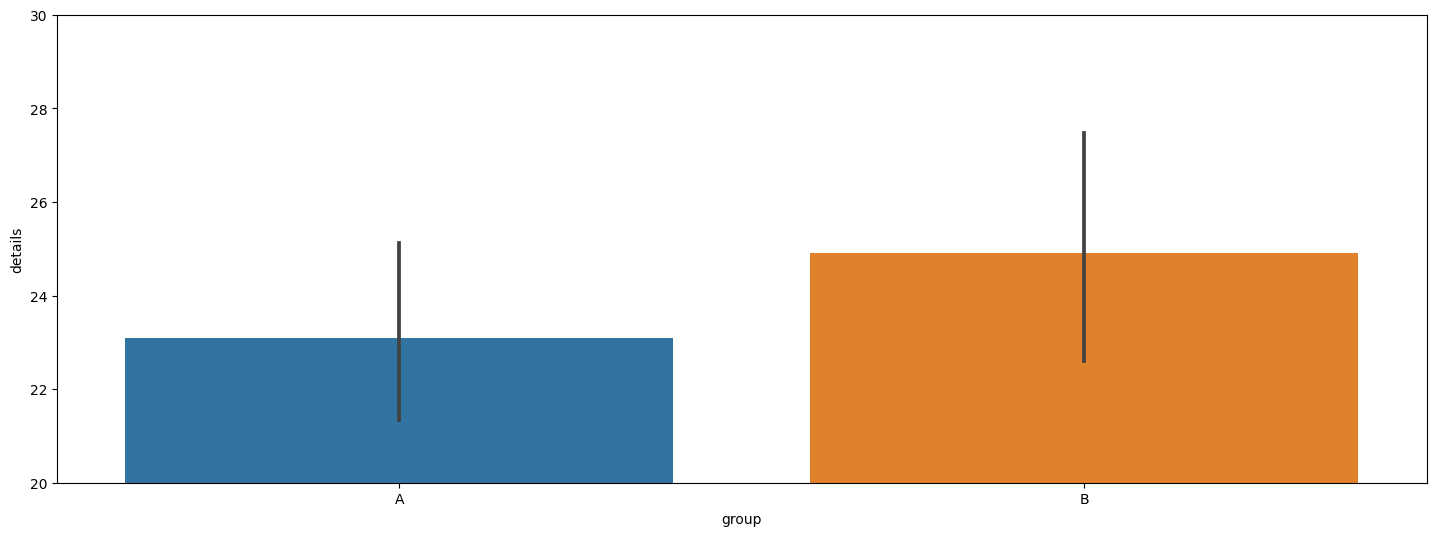

In [121]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=pre_experiment_data8, y = 'details', x = 'group', ax=ax)
ax.set_ylim(20, 30)
fig.tight_layout(pad=3.0)

Aqui utilizamos a data de quando paramos de receber novos usuários e fazemos uma comparação entre os grupos para analisar seu comportamento e saber se existe uma diferença entre eles. Como mostrado existe uma pequena diferença entre eles, sendo o grupo B um pouco melhor. Podemos concluir que o experimento pode ser continuado.

In [122]:
post_experiment_data8 = participanteseventos[participanteseventos['data'] >= experiment_lauch8]
post_experiment_data8.groupby('group').agg({'details' : 'mean', 'user_id' : 'count'}).reset_index()

,group,details,user_id
0,A,24.756936,21799
1,B,20.265209,15883


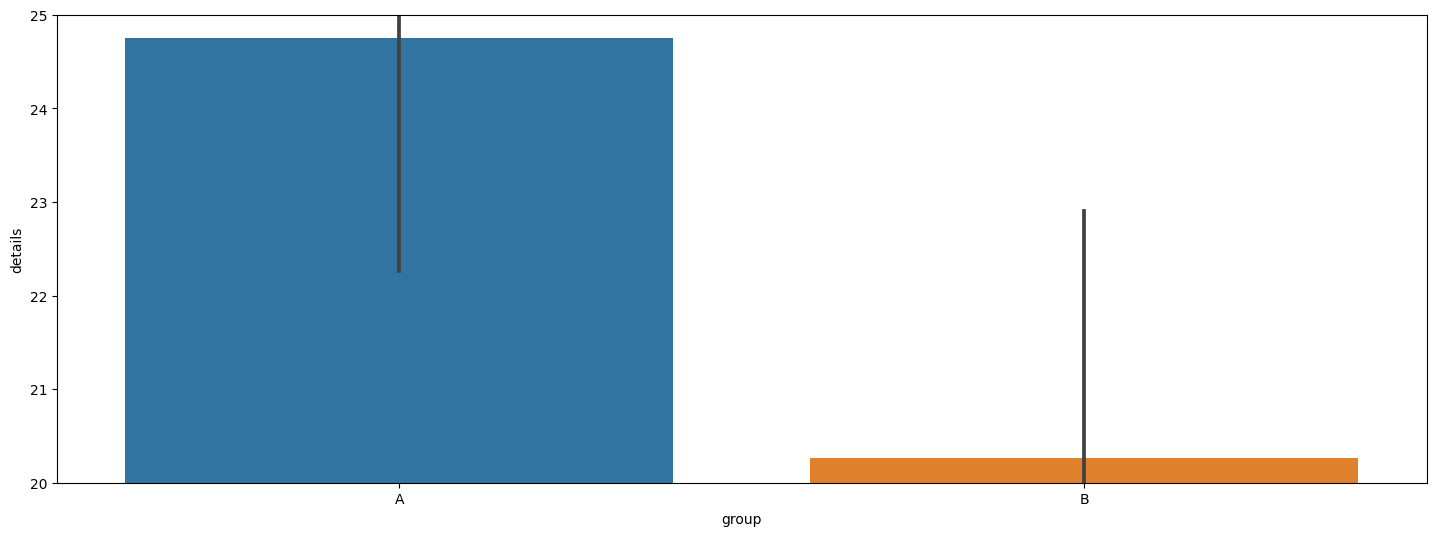

In [123]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=post_experiment_data8, y = 'details', x = 'group', ax=ax)
ax.set_ylim(20, 25)
fig.tight_layout(pad=3.0)

Aqui fizemos a mesma coisa, porém para os dias depois da data base. E nesse caso, podemos perceber que a diferença é muito grande em favor do grupo A. Com isso, aparentemente o teste não está indo muito bem e então o teste deve ser parado.

In [124]:
pre_experiment_data8.isna().sum()

user_id           0
group             0
ab_test           0
event_dt          0
event_name        0
details       55791
data              0
hora              0
dtype: int64

In [125]:
pre_experiment_data_cleaned_rows = pre_experiment_data8.dropna()

In [126]:
ttest_ind(pre_experiment_data_cleaned_rows.query('group == "A"')['details'], pre_experiment_data_cleaned_rows.query('group == "B"')['details'])

Ttest_indResult(statistic=-1.1817791698626894, pvalue=0.2373233485183157)

Para fazer o ttest, primeiramente foi analisado se existia valores ausentes. Foi constatada que existiam valores ausentes na coluna details. Esses valores foram excluidos (não era possível substituir esse valores, pois os valores dessa coluna estavam apenas na coluna purchase, pois é o valor da compra que só ocorre na hora do pagamento). Foi então calculado o p-value. Nesse caso, de antes da data base, o valor é bem acima do alpha = 0.05, ou seja, não podemos rejeitar a hipótese nula (de que o grupo B é melhor do que o grupo A, ou seja, que o teste está funionando).

In [127]:
post_experiment_data8.isna().sum()

user_id           0
group             0
ab_test           0
event_dt          0
event_name        0
details       32193
data              0
hora              0
dtype: int64

In [128]:
post_experiment_data_cleaned_rows = post_experiment_data8.dropna()

In [129]:
ttest_ind(post_experiment_data_cleaned_rows.query('group == "A"')['details'], post_experiment_data_cleaned_rows.query('group == "B"')['details'])

Ttest_indResult(statistic=2.3724237608503875, pvalue=0.017706094063663896)

Nesse caso, de depois da data base, o valor é abaixo do alpha = 0.05, ou seja, podemos rejeitar a hipótese nula (de que o grupo B é melhor do que o grupo A, ou seja, aparentemente o teste não está funcionando).

In [130]:
filter_data = pd.to_datetime('2020-12-21').date()
participanteseventos['data'] = pd.to_datetime(participanteseventos['data']).dt.date
filtered_data = participanteseventos[participanteseventos['data'] > filter_data]

In [131]:
print(f"""
Proporção de usuários que permanecem: {100*round(filtered_data['user_id'].nunique() / participanteseventos['user_id'].nunique(), 3)}
Proporção de usuários que eliminamos: {100*round(1 - filtered_data['user_id'].nunique() / participanteseventos['user_id'].nunique(), 3)}""")



Proporção de usuários que permanecem: 55.60000000000001
Proporção de usuários que eliminamos: 44.4


Aqui calculamos a proporção de usuários que permanecem e os que saem depois da data base. Podemos concluir que tem mais usuários que permanecem, porém a porcentagem está muito parecida.

In [132]:
reference_event = 'login'

# Count occurrences of the reference event
reference_count = eventos['event_name'].value_counts().get(reference_event, 0)

# Count occurrences of all unique values in 'event_name'
event_counts = eventos['event_name'].value_counts()

# Calculate the percentage of each unique value relative to the reference event count
event_percentages_relative_to_reference = (event_counts / reference_count) * 100

# Combine counts and percentages into a DataFrame
event_summary_relative_to_reference = pd.DataFrame({
    'Count': event_counts,
    'Percentage_Relative_to_Reference': event_percentages_relative_to_reference
})

# Display the summary
print(event_summary_relative_to_reference)

               Count  Percentage_Relative_to_Reference
login         182465                        100.000000
product_page  120862                         66.238457
purchase       60314                         33.055106
product_cart   60120                         32.948785


In [133]:
reference_event = 'login'

# Count occurrences of the reference event
reference_count = eventos['event_name'].value_counts().get(reference_event, 0)

# Count occurrences of all unique values in 'event_name'
event_counts = eventos['event_name'].value_counts()
print(event_counts)

login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: event_name, dtype: int64


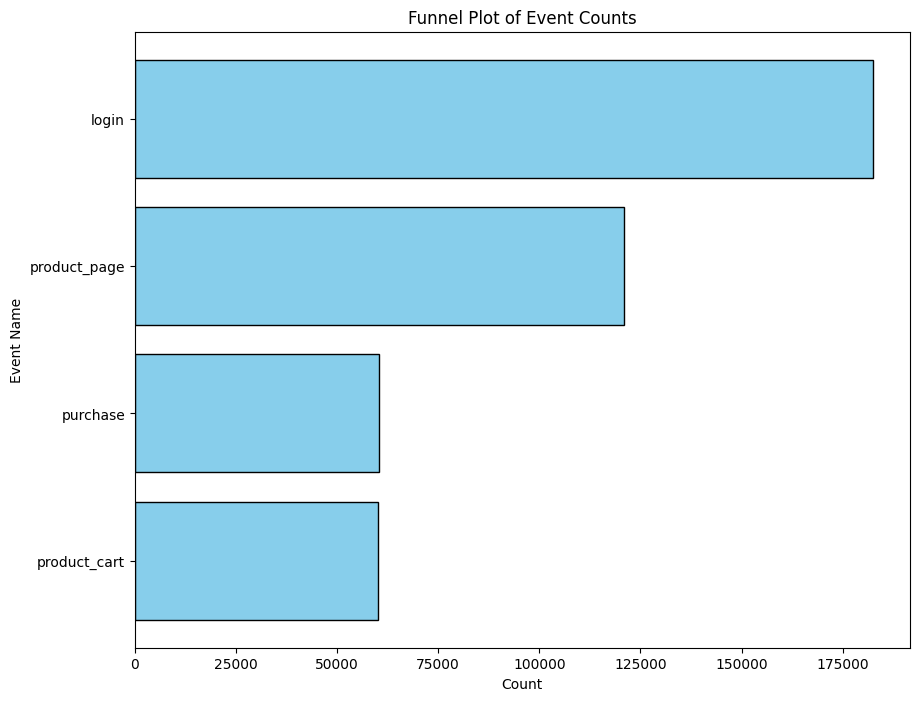

In [134]:
event_counts_sorted = event_counts.sort_values(ascending=False)
plt.figure(figsize=(10, 8))
plt.barh(event_counts_sorted.index, event_counts_sorted, color='skyblue', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Event Name')
plt.title('Funnel Plot of Event Counts')
plt.gca().invert_yaxis()  # Inverter o eixo y para que o maior esteja no topo

plt.show()

Aqui tempo o cálculo da porcentagem de usuários que continuam em comparação com os que fizeram login. Ou seja, a quantidade de usuários em cada fase e a porcentagem relativa.

In [135]:
eventos['data'] = pd.to_datetime(eventos['data'])

In [136]:
event_counts2 = eventos.groupby(['data', 'event_name']).size().unstack(fill_value=0)
event_counts2

event_name,login,product_cart,product_page,purchase
data,,,,
2020-12-07,4913,1582,3240,1650
2020-12-08,5447,1744,3627,1729
2020-12-09,5227,1704,3498,1693
2020-12-10,6045,1998,4022,2012
2020-12-11,6000,1949,3957,1958
2020-12-12,7562,2545,5010,2517
2020-12-13,9020,2994,5951,3020
2020-12-14,11254,3712,7449,3769
2020-12-15,10083,3314,6719,3353


In [137]:
percentage_change = event_counts2.pct_change() * 100
percentage_change

event_name,login,product_cart,product_page,purchase
data,,,,
2020-12-07,NaN,NaN,NaN,NaN
2020-12-08,10.869123,10.240202,11.944444,4.787879
2020-12-09,-4.038921,-2.293578,-3.556658,-2.082128
2020-12-10,15.649512,17.253521,14.979989,18.842292
2020-12-11,-0.744417,-2.452452,-1.616111,-2.683897
2020-12-12,26.033333,30.579785,26.611069,28.549540
2020-12-13,19.280614,17.642436,18.782435,19.984108
2020-12-14,24.767184,23.981296,25.172240,24.801325
2020-12-15,-10.405189,-10.721983,-9.799973,-11.037410


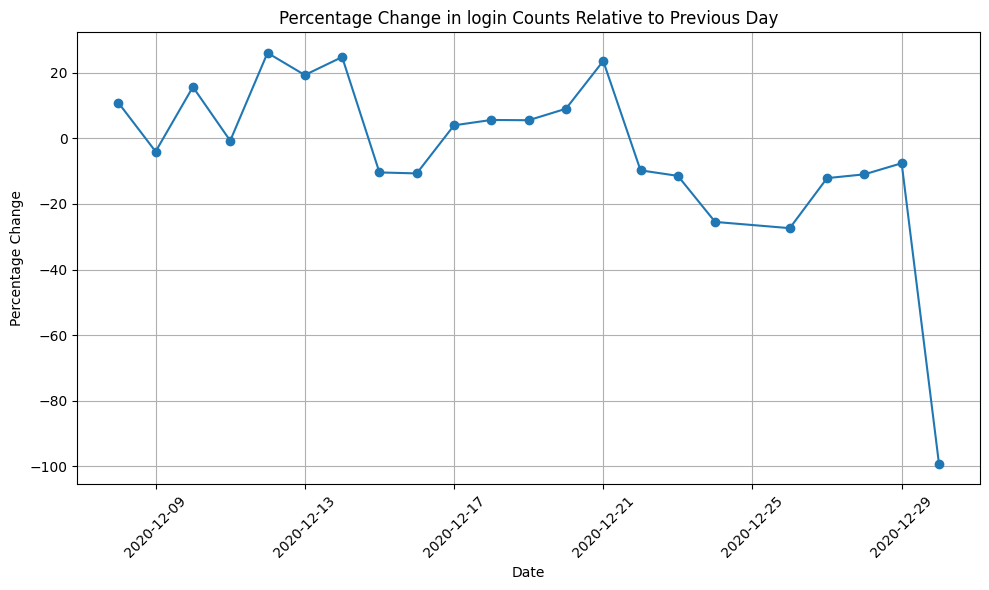

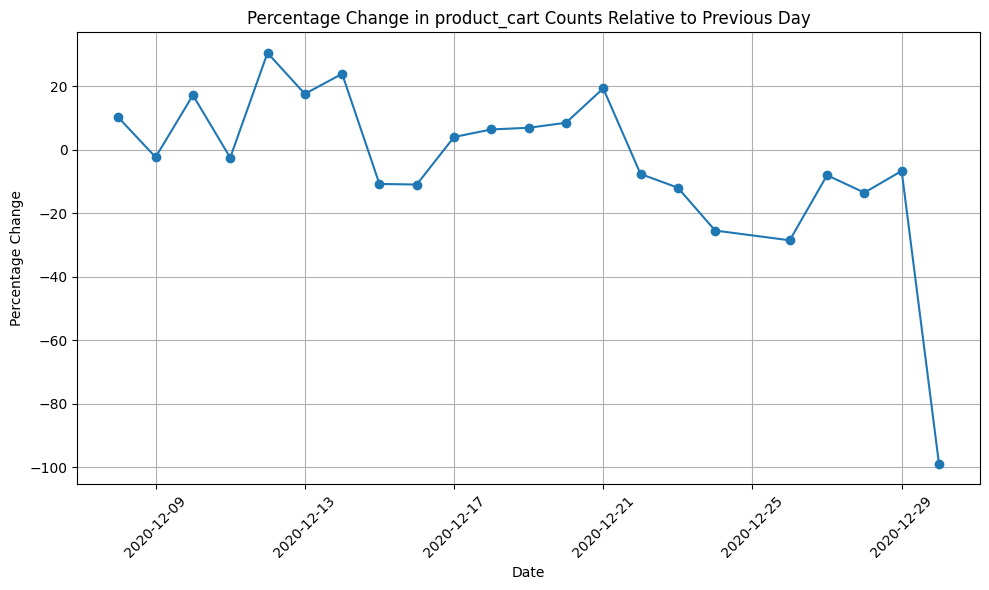

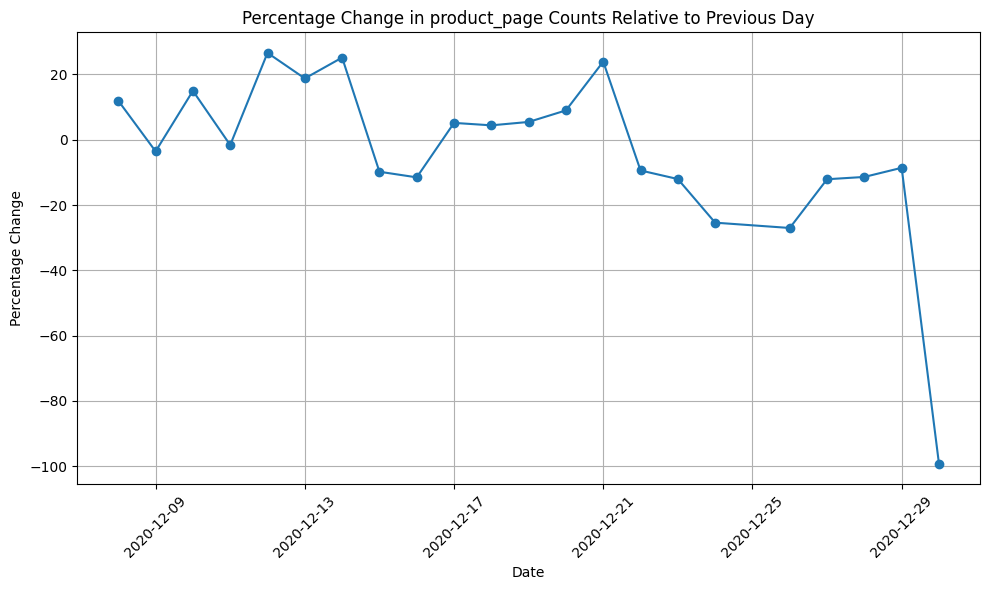

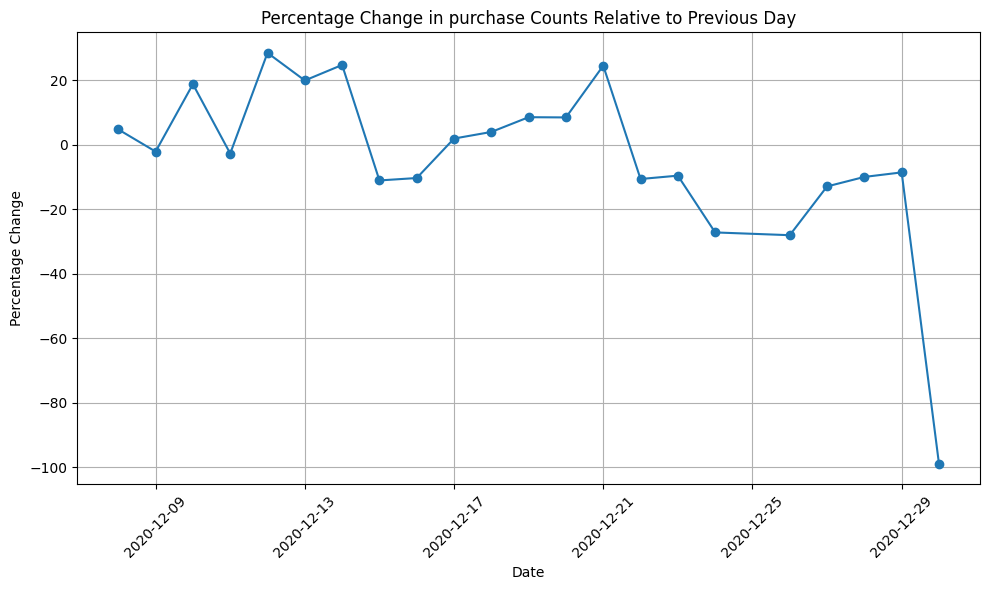

In [138]:
# Sample data for demonstration (you'll use your own `event_counts2`)
# Assuming `event_counts2` is your DataFrame with daily event counts
# eventos = pd.DataFrame({'data': ['2024-08-01', '2024-08-02', '2024-08-03', '2024-08-01', '2024-08-02'],
#                          'event_name': ['Event1', 'Event1', 'Event1', 'Event2', 'Event2'],
#                          'count': [5, 7, 6, 3, 5]})
# event_counts2 = eventos.groupby(['data', 'event_name']).size().unstack(fill_value=0)

# Calculate the percentage change from the previous day
percentage_change = event_counts2.pct_change() * 100

# Plot each event type separately
for event_name in percentage_change.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(percentage_change.index, percentage_change[event_name], marker='o', linestyle='-')
    plt.title(f'Percentage Change in {event_name} Counts Relative to Previous Day')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Aqui calculamos a quantidade de eventos para cada data, depois calculamos a porcentagem em relação ao dia anterior e depois colcoamos esses valores (quantidade de eventos em um gráfico). Observando, podemos concluir que ele está estável até o dia 29/12/2020 quando ocorre uma grande queda e isso ocorre em todos os gráficos, ou seja, em todas as etapas.

In [139]:
calendarioeventos = calendarioeventos.rename(columns={'Region_1' : 'region'})

In [140]:
eventosmarketing = calendarioeventos.merge(novosusuarios, on = 'region')

In [141]:
eventosmarketing.head(10)

,name,regions,start_dt,finish_dt,region,Region_2,Region_3,Region_4,user_id,first_date,device,dia
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,EU,N.America,None,None,D72A72121175D8BE,2020-12-07,PC,7
1,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,EU,N.America,None,None,2E1BF1D4C37EA01F,2020-12-07,PC,7
2,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,EU,N.America,None,None,50734A22C0C63768,2020-12-07,iPhone,7
3,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,EU,N.America,None,None,8942E64218C9A1ED,2020-12-07,PC,7
4,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,EU,N.America,None,None,FFCEA1179C253104,2020-12-07,Android,7
5,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,EU,N.America,None,None,084A22B980BA8169,2020-12-07,Android,7
6,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,EU,N.America,None,None,8ACC2420471B31E4,2020-12-07,PC,7
7,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,EU,N.America,None,None,E6DE857AFBDC6102,2020-12-07,PC,7
8,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,EU,N.America,None,None,5BE017E9C8CC42F8,2020-12-07,Android,7
9,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,EU,N.America,None,None,7B6452F081F49504,2020-12-07,iPhone,7


In [142]:
eventosmarketing.groupby('name')['region'].count()

name
4th of July Promo                    9155
Black Friday Ads Campaign           46270
CIS New Year Gift Lottery            3155
Chinese Moon Festival                3153
Chinese New Year Promo               3153
Christmas&New Year Promo            46270
Dragon Boat Festival Giveaway        3153
Easter Promo                        46270
International Women's Day Promo     46270
Labor day (May 1st) Ads Campaign    46270
Single's Day Gift Promo              3153
St. Patric's Day Promo              46270
St. Valentine's Day Giveaway        46270
Victory Day CIS (May 9th) Event      3155
Name: region, dtype: int64

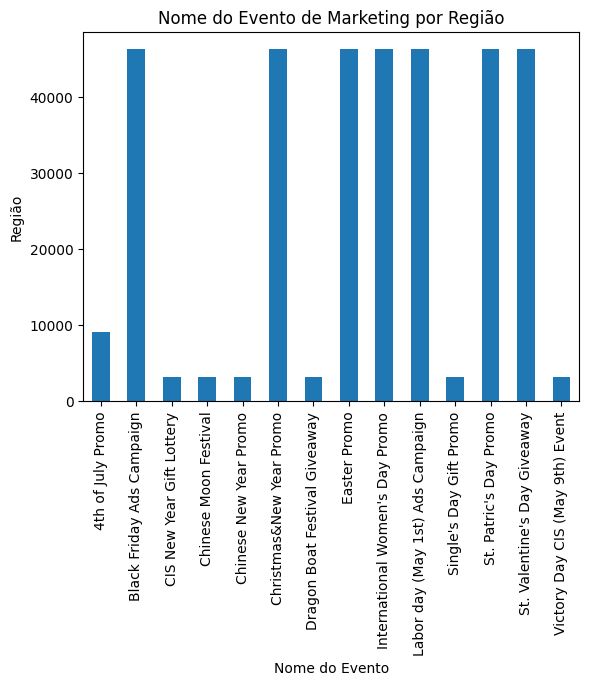

In [143]:
eventosmarketing.groupby('name')['region'].count().plot(kind = 'bar')
plt.title('Nome do Evento de Marketing por Região')
plt.xlabel('Nome do Evento')
plt.ylabel('Região')
plt.show()

Nessa tabela e nesse gráfico pudemos analisar o comportamento dos eventos de marketing em relação as regiões. Podemos perceber o equilibro entre alguns eventos e alguns eventos com pouca quantidade.

In [144]:
eventosmarketing.groupby('region')['name'].count()

region
APAC          12612
CIS            6310
EU           323890
N.America      9155
Name: name, dtype: int64

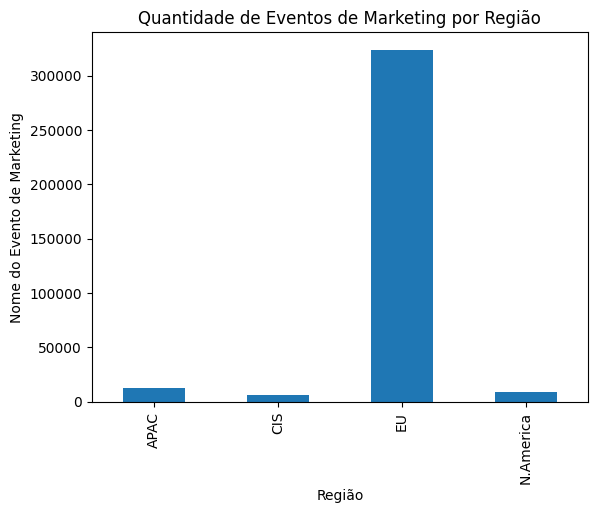

In [145]:
eventosmarketing.groupby('region')['name'].count().plot(kind = 'bar')
plt.title('Quantidade de Eventos de Marketing por Região')
plt.xlabel('Região')
plt.ylabel('Nome do Evento de Marketing')
plt.show()

Nessa tabela e nesse gráfico pudemos analisar a quantidade de eventos por região. Podemos perceber que a maioria acontece na região EU.

In [150]:
novosusuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
 4   dia         61733 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.4+ MB


In [152]:
novosusuarios.groupby('first_date')['region'].count()

first_date
2020-12-07    5595
2020-12-08    3239
2020-12-09    2101
2020-12-10    3076
2020-12-11    2390
2020-12-12    3963
2020-12-13    4691
2020-12-14    5654
2020-12-15    3043
2020-12-16    2110
2020-12-17    3048
2020-12-18    3365
2020-12-19    3617
2020-12-20    4288
2020-12-21    6290
2020-12-22    3083
2020-12-23    2180
Name: region, dtype: int64

In [164]:
eu_usuarios = novosusuarios[novosusuarios['region'] == 'EU']

# Agrupa por 'first_date' e conta o número de registros em cada data
contagem_por_data = eu_usuarios.groupby('first_date')['region'].count()

contagem_por_data = contagem_por_data.sort_index()

# Calcula a soma cumulativa
soma_cumulativa = contagem_por_data.cumsum()

# Exibe o resultado
print(soma_cumulativa)

first_date
2020-12-07     4205
2020-12-08     6620
2020-12-09     8228
2020-12-10    10580
2020-12-11    12384
2020-12-12    15368
2020-12-13    18879
2020-12-14    23121
2020-12-15    25404
2020-12-16    26986
2020-12-17    29259
2020-12-18    31805
2020-12-19    34462
2020-12-20    37690
2020-12-21    42340
2020-12-22    44632
2020-12-23    46270
Name: region, dtype: int64


In [165]:
diferenca = soma_cumulativa.diff()

# Calcula a porcentagem de aumento em relação ao valor acumulado do dia anterior
percentual_aumento = (diferenca / soma_cumulativa.shift(1)) * 100

# Exclui o primeiro valor NaN que é resultado do cálculo da diferença
percentual_aumento = percentual_aumento.dropna()

# Exibe o resultado
print(percentual_aumento)

first_date
2020-12-08    57.431629
2020-12-09    24.290030
2020-12-10    28.585318
2020-12-11    17.051040
2020-12-12    24.095607
2020-12-13    22.846174
2020-12-14    22.469410
2020-12-15     9.874140
2020-12-16     6.227366
2020-12-17     8.422886
2020-12-18     8.701596
2020-12-19     8.354032
2020-12-20     9.366839
2020-12-21    12.337490
2020-12-22     5.413321
2020-12-23     3.670013
Name: region, dtype: float64


In [172]:
percentual_aumento.mean()

16.82105572838289

Aumento de mais de 20% até o dia 14/12/2020, um aumento de 12% no dua 21/12/2020 e demais dias com um aumento de menos que 10%. Calculando a média, tivemos um aumento médio de 16,8%

In [178]:
namerica_usuarios = novosusuarios[novosusuarios['region'] == 'N.America']

# Agrupa por 'first_date' e conta o número de registros em cada data
contagem_por_data2 = namerica_usuarios.groupby('first_date')['region'].count()

contagem_por_data2 = contagem_por_data2.sort_index()

# Calcula a soma cumulativa
soma_cumulativa2 = contagem_por_data2.cumsum()

# Exibe o resultado
print(soma_cumulativa2)

first_date
2020-12-07     842
2020-12-08    1335
2020-12-09    1643
2020-12-10    2070
2020-12-11    2419
2020-12-12    3000
2020-12-13    3705
2020-12-14    4529
2020-12-15    4948
2020-12-16    5262
2020-12-17    5723
2020-12-18    6226
2020-12-19    6778
2020-12-20    7409
2020-12-21    8347
2020-12-22    8815
2020-12-23    9155
Name: region, dtype: int64


In [179]:
diferenca2 = soma_cumulativa2.diff()

# Calcula a porcentagem de aumento em relação ao valor acumulado do dia anterior
percentual_aumento2 = (diferenca2 / soma_cumulativa2.shift(1)) * 100

# Exclui o primeiro valor NaN que é resultado do cálculo da diferença
percentual_aumento2 = percentual_aumento2.dropna()

# Exibe o resultado
print(percentual_aumento2)

first_date
2020-12-08    58.551069
2020-12-09    23.071161
2020-12-10    25.989044
2020-12-11    16.859903
2020-12-12    24.018189
2020-12-13    23.500000
2020-12-14    22.240216
2020-12-15     9.251490
2020-12-16     6.345998
2020-12-17     8.760927
2020-12-18     8.789097
2020-12-19     8.866046
2020-12-20     9.309531
2020-12-21    12.660278
2020-12-22     5.606805
2020-12-23     3.857062
Name: region, dtype: float64


In [180]:
percentual_aumento2.mean()

16.729801060671477

Aumento de mais de 20% até dia 14/12/2020, um aumento de 12% no dia 21/12/2020 e demais dias um aumento menor que 10%. Claulando a média, tivemos um aumento médio de 16,7% 

In [181]:
apac_usuarios = novosusuarios[novosusuarios['region'] == 'APAC']

# Agrupa por 'first_date' e conta o número de registros em cada data
contagem_por_data3 = apac_usuarios.groupby('first_date')['region'].count()

contagem_por_data3 = contagem_por_data3.sort_index()

# Calcula a soma cumulativa
soma_cumulativa3 = contagem_por_data3.cumsum()

# Exibe o resultado
print(soma_cumulativa3)

first_date
2020-12-07     255
2020-12-08     420
2020-12-09     511
2020-12-10     670
2020-12-11     785
2020-12-12     984
2020-12-13    1215
2020-12-14    1513
2020-12-15    1692
2020-12-16    1808
2020-12-17    1987
2020-12-18    2154
2020-12-19    2358
2020-12-20    2551
2020-12-21    2883
2020-12-22    3041
2020-12-23    3153
Name: region, dtype: int64


In [182]:
diferenca3 = soma_cumulativa3.diff()

# Calcula a porcentagem de aumento em relação ao valor acumulado do dia anterior
percentual_aumento3 = (diferenca3 / soma_cumulativa3.shift(1)) * 100

# Exclui o primeiro valor NaN que é resultado do cálculo da diferença
percentual_aumento3 = percentual_aumento3.dropna()

# Exibe o resultado
print(percentual_aumento3)

first_date
2020-12-08    64.705882
2020-12-09    21.666667
2020-12-10    31.115460
2020-12-11    17.164179
2020-12-12    25.350318
2020-12-13    23.475610
2020-12-14    24.526749
2020-12-15    11.830800
2020-12-16     6.855792
2020-12-17     9.900442
2020-12-18     8.404630
2020-12-19     9.470752
2020-12-20     8.184902
2020-12-21    13.014504
2020-12-22     5.480402
2020-12-23     3.682999
Name: region, dtype: float64


In [183]:
percentual_aumento3.mean()

17.80188059460075

Aumento de mais de 20% até 14/12/2020, um aumento de 11% no dia 15/12/2020, um aumento de 13% no dia 21/12/2020 e demais dias com um aumento menor que 10%. Calculando a média, tivemos um aumento médio de 17,8%.

In [170]:
cis_usuarios = novosusuarios[novosusuarios['region'] == 'CIS']

# Agrupa por 'first_date' e conta o número de registros em cada data
contagem_por_data4 = cis_usuarios.groupby('first_date')['region'].count()

contagem_por_data4 = contagem_por_data4.sort_index()

# Calcula a soma cumulativa
soma_cumulativa4 = contagem_por_data4.cumsum()

# Exibe o resultado
print(soma_cumulativa4)

first_date
2020-12-07     293
2020-12-08     459
2020-12-09     553
2020-12-10     691
2020-12-11     813
2020-12-12    1012
2020-12-13    1256
2020-12-14    1546
2020-12-15    1708
2020-12-16    1806
2020-12-17    1941
2020-12-18    2090
2020-12-19    2294
2020-12-20    2530
2020-12-21    2900
2020-12-22    3065
2020-12-23    3155
Name: region, dtype: int64


In [171]:
diferenca4 = soma_cumulativa4.diff()

# Calcula a porcentagem de aumento em relação ao valor acumulado do dia anterior
percentual_aumento4 = (diferenca4 / soma_cumulativa4.shift(1)) * 100

# Exclui o primeiro valor NaN que é resultado do cálculo da diferença
percentual_aumento4 = percentual_aumento4.dropna()

# Exibe o resultado
print(percentual_aumento4)

first_date
2020-12-08    56.655290
2020-12-09    20.479303
2020-12-10    24.954792
2020-12-11    17.655572
2020-12-12    24.477245
2020-12-13    24.110672
2020-12-14    23.089172
2020-12-15    10.478655
2020-12-16     5.737705
2020-12-17     7.475083
2020-12-18     7.676455
2020-12-19     9.760766
2020-12-20    10.287707
2020-12-21    14.624506
2020-12-22     5.689655
2020-12-23     2.936378
Name: region, dtype: float64


In [184]:
percentual_aumento4.mean()

16.630559717461793

Aumento de mais de 20% até dia 14/12/2020, um aumento de 10% nos dias 15/12/2020 e 20/12/2020, um aumento de 14% no dia 21/12/2020 e demais dias com um aumento menor que 10%. Calculando a média, tivemos um aumento médio de 16,6%.

# Premissas e conclusões:

- Data de quando pararam de receber novos usuários não ocorreu dia 21/12/2020, mas sim dia 23/12/2020
- O público da região EU realmente teve um aumento de mais de 15%, assim como nas demais regiões
- O proposto do teste de introduzir mudanças realmente aconteceu, porém não houve um aumento de pelo menos 10% a cada nova etapa, que era o resultado esperado
- O número de participantes no teste foi de 6311, porém vários participantes estavam nos dois grupos. E excluindo os valores duplicados, a quantidade vai para 5880, menor que o esperado (6000)

# Conclusão:

- a partir de um determinado dia, o teste aparentemente não vale mais a pena. Com isso, o ideal é a descontinuidade do mesmo.
- pudemos analisar o comportamento dos usuários e a quantidade que perdemos durante o processo.
- não é possível concluir se realmente tivemos um aumento de 15% de novos usuários e enm se tivemos um aumento de 10% nas etapas de funil.